In [12]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from datetime import date
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn import linear_model
from statsmodels.tsa.statespace.sarimax import SARIMAX
from itertools import combinations
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.api import VAR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import ParameterGrid
import numpy as np
import warnings
from sklearn.pipeline import make_pipeline
from sklearn.kernel_ridge import KernelRidge
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_friedman2
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import SGDRegressor
import statsmodels.api as sm
import itertools
import pmdarima as pm
from sklearn.pipeline import make_pipeline
from pmdarima.arima import auto_arima
from sklearn.kernel_ridge import KernelRidge		
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.ar_model import AutoReg
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from pmdarima.model_selection import train_test_split
from evds import evdsAPI
import pandas as pd
import numpy as np
import requests
import json
from urllib.parse import urlencode
warnings.filterwarnings("ignore")

In [13]:
with open("C:/Users/Bora/Desktop/api.txt") as api:
    key=api.read()



In [14]:
import yfinance as yf 


In [15]:
params = {
    'series': "TP.DK.USD.S.YTL",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

usd = formatted_response['items']
usd = pd.DataFrame(usd)


usd = usd.drop(columns=['UNIXTIME','Tarih'])
usd.columns = ['USD/TL']
usd['USD/TL'] = pd.to_numeric(usd['USD/TL'])
usd=usd.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(usd)))
usd

,USD/TL
2006-01-31,1.334344
2006-02-28,1.326535
2006-03-31,1.335139
2006-04-30,1.337345
2006-05-31,1.420659
...,...
2024-01-31,30.053750
2024-02-29,30.759448
2024-03-31,31.986743
2024-04-30,32.329467


In [16]:
params = {
    'series': "TP.FE.OKTG01",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

enf = formatted_response['items']
enf = pd.DataFrame(enf)


enf = enf.drop(columns=['UNIXTIME','Tarih'])
enf.columns = ['TÜFE']
enf['TÜFE'] = pd.to_numeric(enf['TÜFE'])
enf=enf.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(enf)))
enf

,TÜFE
2006-01-31,123.57
2006-02-28,123.84
2006-03-31,124.18
2006-04-30,125.84
2006-05-31,128.20
...,...
2023-12-31,1859.38
2024-01-31,1984.02
2024-02-29,2073.88
2024-03-31,2139.47


In [17]:
params = {
    'series': "TP.PR.ARZ13",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'last',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

money = formatted_response['items']
money = pd.DataFrame(money)


money = money.drop(columns=['UNIXTIME','Tarih'])
money.columns = ['Para Arzi']
money['Para Arzi'] = pd.to_numeric(money['Para Arzi'])
money=money.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(money)))
money=money.pct_change()*100
money=money.dropna()
money

,Para Arzi
2006-02-28,2.121748
2006-03-31,2.927613
2006-04-30,1.084694
2006-05-31,9.121170
2006-06-30,1.433197
...,...
2024-01-31,0.992308
2024-02-29,1.467195
2024-03-31,2.396667
2024-04-30,1.982216


In [18]:
params = {
    'series': "TP.PR.ARZ22",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 1,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

m3 = formatted_response['items']
m3 = pd.DataFrame(m3)


m3 = m3.drop(columns=['UNIXTIME','YEARWEEK'])
m3.columns = ['Tarih','M3']
m3['M3'] = pd.to_numeric(m3['M3'])
m3 = m3.set_index(pd.to_datetime(m3["Tarih"], format="%d-%m-%Y"))
del m3["Tarih"]
m3=m3.pct_change(4)*100
m3=m3.resample('M').last()
m3=m3.dropna()
m3

,M3
Tarih,
2006-02-28,2.204708
2006-03-31,2.711175
2006-04-30,1.323922
2006-05-31,9.308200
2006-06-30,-0.288618
...,...
2024-01-31,1.119951
2024-02-29,2.359600
2024-03-31,2.687835


In [19]:
params = {
    'series': "TP.TIG08",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'last',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

issizlik = formatted_response['items']
issizlik = pd.DataFrame(issizlik)


issizlik = issizlik.drop(columns=['UNIXTIME','Tarih'])
issizlik.columns = ['İşsizlik']
issizlik['İşsizlik'] = pd.to_numeric(issizlik['İşsizlik'])
issizlik=issizlik.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(issizlik)))
issizlik=issizlik.dropna()
issizlik

,İşsizlik
2014-01-31,9.2
2014-02-28,9.5
2014-03-31,9.5
2014-04-30,9.7
2014-05-31,9.7
...,...
2023-11-30,9.0
2023-12-31,8.8
2024-01-31,9.0
2024-02-29,8.7


In [20]:
import yfinance as yf
df14=yf.download("BZ=F")["Close"]
df14=pd.DataFrame(df14)
df14.columns=["Brent"]
df14=df14.resample('M').mean()
df14

[*********************100%%**********************]  1 of 1 completed


,Brent
Date,
2007-07-31,76.395000
2007-08-31,71.258696
2007-09-30,77.135263
2007-10-31,82.456957
2007-11-30,92.060953
...,...
2024-01-31,79.197143
2024-02-29,81.623999
2024-03-31,84.665499


In [21]:
params = {
    'series': "TP.KREDI.L001",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 1,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

kredi = formatted_response['items']
kredi = pd.DataFrame(kredi)


kredi = kredi.drop(columns=['UNIXTIME','YEARWEEK'])
kredi.columns = ['Tarih','Kredi']
kredi['Kredi'] = pd.to_numeric(kredi['Kredi'])
kredi = kredi.set_index(pd.to_datetime(kredi["Tarih"], format="%d-%m-%Y"))
del kredi["Tarih"]
kredi=kredi.pct_change(4)*100
kredi=kredi.resample('M').last()
kredi=kredi.dropna()
kredi

,Kredi
Tarih,
2006-02-28,1.559036
2006-03-31,5.768193
2006-04-30,3.124932
2006-05-31,8.993162
2006-06-30,3.965727
...,...
2024-01-31,1.789324
2024-02-29,3.130261
2024-03-31,4.108658


In [22]:
params = {
    'series': "TP.APIFON4",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

pfaiz = formatted_response['items']
pfaiz = pd.DataFrame(pfaiz)


pfaiz = pfaiz.drop(columns=['UNIXTIME','Tarih'])
pfaiz.columns = ['Faiz']
pfaiz['Faiz'] = pd.to_numeric(pfaiz['Faiz'])
pfaiz=pfaiz.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(pfaiz)))
pfaiz=pfaiz.dropna()
pfaiz

,Faiz
2011-01-31,6.438571
2011-02-28,6.250000
2011-03-31,6.250000
2011-04-30,6.267619
2011-05-31,6.250000
...,...
2024-01-31,42.703182
2024-02-29,45.239524
2024-03-31,47.287619
2024-04-30,51.357222


In [23]:
motorin=pd.read_excel("./motorin.xlsx")
motorin.columns=["Tarih","Motorin"]
motorin=motorin.set_index(pd.date_range(start="2003-01-01",periods=len(motorin),freq="1M"))
del motorin["Tarih"]
motorin=motorin.astype(float)
motorin

,Motorin
2003-01-31,1.366645
2003-02-28,1.457199
2003-03-31,1.529555
2003-04-30,1.439813
2003-05-31,1.404363
...,...
2023-12-31,36.420000
2024-01-31,39.450000
2024-02-29,42.530000
2024-03-31,41.420000


In [24]:
params = {
    'series': "TP.TRY.MT02",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

mfaiz = formatted_response['items']
mfaiz = pd.DataFrame(mfaiz)


mfaiz = mfaiz.drop(columns=['UNIXTIME','Tarih'])
mfaiz.columns = ['Mevduat Faizi']
mfaiz['Mevduat Faizi'] = pd.to_numeric(mfaiz['Mevduat Faizi'])
mfaiz=mfaiz.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(mfaiz)))
mfaiz=mfaiz.dropna()
mfaiz

,Mevduat Faizi
2006-01-31,15.913333
2006-02-28,15.760000
2006-03-31,15.330000
2006-04-30,15.175000
2006-05-31,14.925000
...,...
2024-01-31,50.482500
2024-02-29,51.460000
2024-03-31,57.272000
2024-04-30,67.567500


In [25]:
params = {
    'series': "TP.BEK.S01.A.S",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

enf_belirsizlik = formatted_response['items']
enf_belirsizlik = pd.DataFrame(enf_belirsizlik)


enf_belirsizlik = enf_belirsizlik.drop(columns=['UNIXTIME','Tarih'])
enf_belirsizlik.columns = ['Enflasyon Belirsizliği']
enf_belirsizlik['Enflasyon Belirsizliği'] = pd.to_numeric(enf_belirsizlik['Enflasyon Belirsizliği'])
enf_belirsizlik=enf_belirsizlik.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(enf_belirsizlik)))
enf_belirsizlik=enf_belirsizlik.dropna()
enf_belirsizlik

,Enflasyon Belirsizliği
2013-01-31,0.32
2013-02-28,0.22
2013-03-31,0.16
2013-04-30,0.26
2013-05-31,0.29
...,...
2024-01-31,1.21
2024-02-29,0.94
2024-03-31,0.64
2024-04-30,0.55


In [26]:
params = {
    'series': "TP.FG.B01.95",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

ito = formatted_response['items']
ito = pd.DataFrame(ito)


ito = ito.drop(columns=['UNIXTIME','Tarih'])
ito.columns = ['İTO']
ito['İTO'] = pd.to_numeric(ito['İTO'])
ito=ito.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(ito)))
ito=ito.pct_change()*100
ito=ito.dropna()
ito

,İTO
2006-02-28,1.005528
2006-03-31,0.137253
2006-04-30,2.088936
2006-05-31,1.595826
2006-06-30,-0.100368
...,...
2023-12-31,3.524063
2024-01-31,6.717124
2024-02-29,4.070637
2024-03-31,3.926249


In [27]:
params = {
    'series': "TP.FE.OKTG04",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

tufec = formatted_response['items']
tufec = pd.DataFrame(tufec)


tufec = tufec.drop(columns=['UNIXTIME','Tarih'])
tufec.columns = ['TÜFE C']
tufec['TÜFE C'] = pd.to_numeric(tufec['TÜFE C'])
tufec=tufec.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(tufec)))
tufec=tufec.pct_change()*100
tufec=tufec.shift(1)
tufec=tufec.dropna()
tufec

,TÜFE C
2006-03-31,-1.101304
2006-04-30,-0.368460
2006-05-31,1.857331
2006-06-30,2.622237
2006-07-31,1.344445
...,...
2023-12-31,1.960293
2024-01-31,2.305439
2024-02-29,7.576163
2024-03-31,3.571725


In [28]:
params = {
    'series': "TP.TUFE1YI.T1",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

üfe = formatted_response['items']
üfe = pd.DataFrame(üfe)


üfe = üfe.drop(columns=['UNIXTIME','Tarih'])
üfe.columns = ['ÜFE']
üfe['ÜFE'] = pd.to_numeric(üfe['ÜFE'])
üfe=üfe.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(üfe)))
üfe=üfe.pct_change()*100
üfe=üfe.dropna()
üfe

,ÜFE
2006-02-28,0.256616
2006-03-31,0.247960
2006-04-30,1.938881
2006-05-31,2.770820
2006-06-30,4.021325
...,...
2023-12-31,1.144328
2024-01-31,4.136164
2024-02-29,3.737000
2024-03-31,3.294983


In [29]:
params = {
    'series': "TP.IHRISICREV4.TT",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

ihracat = formatted_response['items']
ihracat = pd.DataFrame(ihracat)


ihracat = ihracat.drop(columns=['UNIXTIME','Tarih'])
ihracat.columns = ['ÜFE']
ihracat['ÜFE'] = pd.to_numeric(ihracat['ÜFE'])
ihracat=ihracat.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(ihracat)))
ihracat=ihracat.shift(1)
ihracat=ihracat.dropna()
ihracat=ihracat.pct_change()*100
ihracat

,ÜFE
2013-02-28,NaN
2013-03-31,7.272509
2013-04-30,6.926004
2013-05-31,-4.381315
2013-06-30,5.141469
...,...
2023-12-31,0.693838
2024-01-31,0.017009
2024-02-29,-13.018698
2024-03-31,5.575513


In [30]:
params = {
    'series': "TP.ITHISICREV4.TT",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

ithalat = formatted_response['items']
ithalat = pd.DataFrame(ithalat)


ithalat = ithalat.drop(columns=['UNIXTIME','Tarih'])
ithalat.columns = ['ÜFE']
ithalat['ÜFE'] = pd.to_numeric(ithalat['ÜFE'])
ithalat=ithalat.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(ithalat)))
ithalat=ithalat.shift(1)
ithalat=ithalat.dropna()
ithalat=ithalat.pct_change()*100
ithalat

,ÜFE
2013-02-28,NaN
2013-03-31,3.993020
2013-04-30,4.802567
2013-05-31,11.093906
2013-06-30,0.635134
...,...
2023-12-31,-1.607103
2024-01-31,0.411271
2024-02-29,-9.758116
2024-03-31,6.304695


In [31]:
params = {
    'series': "TP.PKAUO.S01.A.U",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

anket = formatted_response['items']
anket = pd.DataFrame(anket)


anket = anket.drop(columns=['UNIXTIME','Tarih'])
anket.columns = ['ÜFE']
anket['ÜFE'] = pd.to_numeric(anket['ÜFE'])
anket=anket.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(anket)))
anket=anket.dropna()

anket

,ÜFE
2013-01-31,0.85
2013-02-28,0.53
2013-03-31,0.48
2013-04-30,0.65
2013-05-31,0.46
...,...
2024-01-31,5.41
2024-02-29,3.80
2024-03-31,3.43
2024-04-30,3.25


In [32]:
data=pd.DataFrame()
data["USD/TL"]=usd["USD/TL"].rolling(3).mean()
data["Motorin"]=motorin["Motorin"]
data["TÜFE"]=enf["TÜFE"]
data["TÜFEt-1"]=data["TÜFE"].shift(1)
data=data.pct_change()*100
data["M3"]=m3["M3"].shift(1)
data["ÜFEt1"]=üfe["ÜFE"]
data["ÜFEt2"]=üfe["ÜFE"].shift(1)
data["TÜFECt1"]=tufec["TÜFE C"]
data["TÜFECt2"]=tufec["TÜFE C"].shift(1)
data["İTO"]=ito["İTO"]
data["İhracat"]=ihracat["ÜFE"]
data["İthalat"]=ithalat["ÜFE"]
data["Anket"]=anket["ÜFE"]
data

,USD/TL,Motorin,TÜFE,TÜFEt-1,M3,ÜFEt1,ÜFEt2,TÜFECt1,TÜFECt2,İTO,İhracat,İthalat,Anket
2006-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-02-28,NaN,0.000000,0.218500,NaN,NaN,0.256616,NaN,NaN,NaN,1.005528,NaN,NaN,NaN
2006-03-31,NaN,0.975610,0.274548,0.218500,2.204708,0.247960,0.256616,-1.101304,NaN,0.137253,NaN,NaN,NaN
2006-04-30,0.075089,2.898551,1.336769,0.274548,2.711175,1.938881,0.247960,-0.368460,-1.101304,2.088936,NaN,NaN,NaN
2006-05-31,2.353679,4.694836,1.875397,1.336769,1.323922,2.770820,1.938881,1.857331,-0.368460,1.595826,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-31,2.580279,8.319605,6.703310,2.927207,4.417846,4.136164,1.144328,2.305439,1.960293,6.717124,0.017009,0.411271,5.41
2024-02-29,2.418218,7.807351,4.529188,6.703310,1.119951,3.737000,4.136164,7.576163,2.305439,4.070637,-13.018698,-9.758116,3.80
2024-03-31,3.239458,-2.609922,3.162671,4.529188,2.359600,3.294983,3.737000,3.571725,7.576163,3.926249,5.575513,6.304695,3.43
2024-04-30,2.452282,1.038146,3.179759,3.162671,2.687835,3.602753,3.294983,3.524351,3.571725,4.894259,7.050664,7.384867,3.25


In [33]:

data["Kredi"]=kredi["Kredi"].rolling(3).mean()
data["ParaArzi"]=money["Para Arzi"].shift(1)
data["İşsizlik"]=issizlik["İşsizlik"]
data["Enflasyon Belirsizliği"]=enf_belirsizlik
data["Mevduat Faizi"]=mfaiz["Mevduat Faizi"]
data["Politika Faizi"]=pfaiz["Faiz"]
data["Zam"]=0
data=data[['USD/TL', 'Motorin','M3', 'Enflasyon Belirsizliği','Zam','TÜFEt-1','ParaArzi','Kredi','Anket','İhracat','İthalat','Mevduat Faizi','İşsizlik','Politika Faizi','ÜFEt2','TÜFECt2','ÜFEt1','TÜFECt1','İTO','TÜFE']]
data.iloc[:12,4]=380.46
data.iloc[12:18,4]=403.03
data.iloc[18:24,4]=419.15
data.iloc[24:30,4]=481.55
data.iloc[30:36,4]=503.26
data.iloc[36:42,4]=527.13
data.iloc[42:48,4]=546.48
data.iloc[48:54,4]=576.57
data.iloc[54:60,4]=599.12
data.iloc[60:66,4]=629.96
data.iloc[66:72,4]=658.95
data.iloc[72:78,4]=701.13
data.iloc[78:84,4]=739.79
data.iloc[84:90,4]=773.01
data.iloc[90:96,4]=803.68
data.iloc[96:102,4]=846.00
data.iloc[102:108,4]=891.03
data.iloc[108:114,4]=949.07
data.iloc[114:120,4]=1000.54
data.iloc[120:132,4]=1300.99
data.iloc[132:144,4]=1404.06
data.iloc[144:156,4]=1603.12
data.iloc[156:168,4]=2020.9
data.iloc[168:180,4]=2324.71
data.iloc[180:192,4]=2825.90
data.iloc[192:198,4]=4253.4
data.iloc[198:204,4]=5500.35
data.iloc[204:210,4]=8506.8
data.iloc[210:216,4]=11402.33
data.iloc[216:,4]=17002
data["Zam"]=data["Zam"].pct_change()*100
data=data.fillna(0)
data["İşsizlik"].iloc[-2:]=8.4
data.iloc[-1,-4]=3.29
data.iloc[-1,-3]=3.5621
data.iloc[-1,-5]=3.5243
data.iloc[-1,-6]=3.73
data.iloc[-1,-2]=4.89
data.iloc[-1,-10]=-3.07
data.iloc[-1,-11]=-14.64

data.iloc[-2,-10]=7.14
data.iloc[-2,-11]=7.07
data.iloc[-1,8]=2.34

data=data.loc["2014-01-31":]
data["TÜFE"].loc["2023-05-31"]+=2.88
data["İTO"].loc["2023-05-31"]+=2.88
data=data.dropna()
data["Motorin"].iloc[-1]=-3.47
data

,USD/TL,Motorin,M3,Enflasyon Belirsizliği,Zam,TÜFEt-1,ParaArzi,Kredi,Anket,İhracat,İthalat,Mevduat Faizi,İşsizlik,Politika Faizi,ÜFEt2,TÜFECt2,ÜFEt1,TÜFECt1,İTO,TÜFE
2014-01-31,3.732429,2.881984,3.413428,0.37,5.265777,0.460607,3.375162,2.886648,1.06,-7.844611,7.652883,9.0220,9.2,7.503636,1.106494,0.625859,3.319203,-0.111246,0.333618,1.978080
2014-02-28,3.033477,1.685899,1.958423,0.31,0.000000,1.978080,1.804994,2.214819,0.69,-6.175956,-14.641565,10.6275,9.5,10.070500,3.319203,-0.111246,1.383675,0.308798,1.009554,0.428192
2014-03-31,2.465778,-2.278097,0.229599,0.16,0.000000,0.428192,0.451349,1.160171,0.65,4.991889,-6.505852,11.3125,9.5,10.200952,1.383675,0.308798,0.736212,0.701489,0.989257,1.125608
2014-04-30,-1.344724,-6.214384,0.730196,0.23,0.000000,1.125608,0.796760,0.126575,0.76,12.575902,13.043316,11.0200,9.7,10.046190,0.736212,0.701489,0.085477,1.197755,2.649799,1.344970
2014-05-31,-1.859714,-0.561578,-0.093468,0.26,0.000000,1.344970,-0.362357,0.464970,0.63,-7.919312,0.662228,10.4940,9.7,9.891000,0.085477,1.197755,-0.520967,2.119546,0.211698,0.395224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-31,2.580279,8.319605,4.417846,1.21,49.109875,2.927207,4.333376,2.531626,5.41,0.017009,0.411271,50.4825,9.0,42.703182,1.144328,1.960293,4.136164,2.305439,6.717124,6.703310
2024-02-29,2.418218,7.807351,1.119951,0.94,0.000000,6.703310,0.992308,2.597683,3.80,-13.018698,-9.758116,51.4600,8.7,45.239524,4.136164,2.305439,3.737000,7.576163,4.070637,4.529188
2024-03-31,3.239458,-2.609922,2.359600,0.64,0.000000,4.529188,1.467195,3.009414,3.43,5.575513,6.304695,57.2720,8.6,47.287619,3.737000,7.576163,3.294983,3.571725,3.926249,3.162671
2024-04-30,2.452282,1.038146,2.687835,0.55,0.000000,3.162671,2.396667,3.023668,3.25,7.070000,7.140000,67.5675,8.4,51.357222,3.294983,3.571725,3.602753,3.524351,4.894259,3.179759


## Cari Ay Enflasyon Tahmini

In [27]:
features=['USD/TL', 'Motorin', 'Zam', 'ParaArzi', 'Kredi', 'Anket','İhracat',
       'İşsizlik', 'ÜFEt2', 'TÜFECt2', 'ÜFEt1', 'TÜFECt1','TÜFE']
data1=data[features]
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
scaled_data = scaler1.fit_transform(data1.iloc[:,:-1])
scaled_data=pd.DataFrame(scaled_data,columns=data1.columns[:-1])
scaler2 = StandardScaler()
scaled_data["TÜFE"]=scaler2.fit_transform(np.array(data1["TÜFE"]).reshape(-1, 1))
scaled_data

,USD/TL,Motorin,Zam,ParaArzi,Kredi,Anket,İhracat,İşsizlik,ÜFEt2,TÜFECt2,ÜFEt1,TÜFECt1,TÜFE
0,0.430918,0.117352,0.251590,0.385889,0.650441,-0.347625,-0.686942,-1.246921,-0.384173,-0.527208,0.352115,-0.881444,0.044998
1,0.222117,-0.043983,-0.294454,-0.181363,0.191869,-0.623921,-0.557754,-1.047008,0.357529,-0.871948,-0.296860,-0.685323,-0.641459
2,0.052526,-0.578672,-0.294454,-0.670392,-0.528004,-0.653791,0.306863,-1.047008,-0.291262,-0.675495,-0.513952,-0.501974,-0.332568
3,-1.085803,-1.109623,-0.294454,-0.545606,-1.233509,-0.571649,0.894019,-0.913733,-0.508292,-0.491836,-0.732141,-0.270264,-0.235411
4,-1.239648,-0.347137,-0.294454,-0.964358,-1.002530,-0.668726,-0.692725,-0.913733,-0.726419,-0.259735,-0.935479,0.160125,-0.656061
...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,0.086731,0.850813,4.798079,0.732061,0.408113,2.900719,-0.078293,-1.380196,-0.371491,0.096900,0.626039,0.246920,2.137840
121,0.038318,0.781717,-0.294454,-0.474961,0.453201,1.698458,-1.087521,-1.580108,0.631376,0.258323,0.492201,2.707852,1.174904
122,0.283651,-0.623431,-0.294454,-0.303399,0.734238,1.422162,0.352047,-1.646746,0.497576,2.723414,0.343994,0.838156,0.569663
123,0.048494,-0.131356,-0.294454,0.032390,0.743967,1.287748,0.467751,-1.780021,0.349411,0.850559,0.447189,0.816037,0.577232


In [28]:
from sklearn.model_selection import train_test_split
X=scaled_data
X=X.iloc[:,:-1]
y=scaled_data["TÜFE"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=scaled_data.columns[:-1])
y=pd.DataFrame(y,columns=["TÜFE"])
X_train,X_test=X.iloc[:-7,:],X.iloc[-7:-1,:]
y_train,y_test=y[:-7],y[-7:-1]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)


In [29]:
import optuna
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,GRU,SimpleRNN
import keras
from keras.callbacks import EarlyStopping
from keras import regularizers
from keras.layers import LSTM, Dense, Dropout
from keras.regularizers import l2,l1
def weighted_mse(y_true, y_pred):
    n = len(y_true)
    weights = 1 / np.arange(1, n + 1)  # Ters orantılı ağırlıklar
    weights = weights[::-1]  # Ağırlıkları ters çevir (küçükten büyüğe)
    mse = np.sum(weights * (y_true - y_pred) ** 2) / n
    return mse
def objective(trial):
    # Define hyperparameters to be optimized
    learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-1)
    units1 = trial.suggest_int('units1', 1, 256)
    batch_size = trial.suggest_int('batch_size', 2, 64)
    activation1 = trial.suggest_categorical('activation1', ['tanh','selu','relu','linear'])
    optimizer = trial.suggest_categorical('optimizer', ['adam'])
    rlrate=trial.suggest_float('rlrate',0.001,0.999)
    keras.utils.set_random_seed(42)
    early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
    model = Sequential()   
    model.add(Dense(units=units1,activation=activation1,input_dim=(X_train.shape[1]),kernel_regularizer=l2(rlrate)))
    model.add(Dense(units=1))

    if optimizer == 'adam':
       optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
       optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
    elif optimizer == 'SGD':
       optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate) 

    

    

    

    model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])

    # Train model
    model.fit(X_train, y_train, epochs=1000, batch_size=batch_size,callbacks=[early_stopping],verbose=0,validation_data=(X_val,y_val))

    # Evaluate model
    y_pred = model.predict(X_test)
    tahminler=pd.DataFrame(scaler2.inverse_transform(y_test))
    tahminler.columns=["TÜFE"]
    tahminler["Tahmin"]=scaler2.inverse_transform(y_pred)
    tahminler=tahminler.set_index(data.index[-7:-1])
    tahminler.loc["2024-01-31"]=6.70
    max=abs(tahminler["TÜFE"]-tahminler["Tahmin"]).max()
    mse=mean_squared_error(tahminler["TÜFE"],tahminler["Tahmin"])


    return mse # Return validation accuracy as the objective

In [ ]:
study = optuna.create_study(direction='minimize')  # or 'minimize' depending on your objective
study.optimize(objective, n_trials=2000)  # You can adjust the number of trials

# Print the best hyperparameters
print('Best hyperparameters:', study.best_params)

In [209]:
study.best_params

{'learning_rate': 0.009377039965970141,
 'units1': 43,
 'batch_size': 7,
 'activation1': 'tanh',
 'optimizer': 'adam',
 'rlrate': 0.2788740756825726}

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
features=['USD/TL', 'Motorin', 'Zam', 'ParaArzi', 'Kredi', 'Anket','İhracat',
       'İşsizlik', 'ÜFEt2', 'TÜFECt2', 'ÜFEt1', 'TÜFECt1','TÜFE']
data1=data[features]
scaler1 = StandardScaler()
scaled_data = scaler1.fit_transform(data1.iloc[:,:-1])
scaled_data=pd.DataFrame(scaled_data,columns=data1.columns[:-1])
scaler2 = StandardScaler()
scaled_data["TÜFE"]=scaler2.fit_transform(np.array(data1["TÜFE"]).reshape(-1, 1))
X=scaled_data
X=X.iloc[:,:-1]
y=scaled_data["TÜFE"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=scaled_data.columns[:-1])
y=pd.DataFrame(y,columns=["TÜFE"])
X_train,X_test=X.iloc[:-7,:],X.iloc[-7:,:]
y_train,y_test=y[:-7],y[-7:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)
keras.utils.set_random_seed(42)
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
model = Sequential()   
model.add(Dense(units=43,activation="tanh",input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.2788740756825726)))
model.add(Dense(units=1))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.009377039965970141)
model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model.fit(X_train, y_train, epochs=1000, batch_size=7,callbacks=[early_stopping],verbose=1,validation_data=(X_val,y_val))
y_pred = model.predict(X_test)
tahminler=pd.DataFrame(scaler2.inverse_transform(y_test))
tahminler.columns=["TÜFE"]
tahminler["NN1"]=scaler2.inverse_transform(y_pred)
tahminler=tahminler.set_index(data.index[-7:])

Epoch 1/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 4.9609 - mean_squared_error: 0.7581 - val_loss: 1.8685 - val_mean_squared_error: 0.1276
Epoch 2/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.5552 - mean_squared_error: 0.2316 - val_loss: 0.6110 - val_mean_squared_error: 0.1244
Epoch 3/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6037 - mean_squared_error: 0.2142 - val_loss: 0.2450 - val_mean_squared_error: 0.0652
Epoch 4/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3647 - mean_squared_error: 0.2045 - val_loss: 0.1522 - val_mean_squared_error: 0.0647
Epoch 5/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2290 - mean_squared_error: 0.1452 - val_loss: 0.1672 - val_mean_squared_error: 0.0989
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


In [32]:
tahminler

,TÜFE,NN1
2023-11-30,3.281097,3.153005
2023-12-31,2.927207,2.336637
2024-01-31,6.703310,6.660959
2024-02-29,4.529188,4.349838
2024-03-31,3.162671,2.816653
2024-04-30,3.179759,3.371770
2024-05-31,0.000000,2.417900


In [33]:
features=['USD/TL', 'Motorin', 'Zam', 'ParaArzi', 'Kredi', 'Anket','İhracat',
       'İşsizlik', 'ÜFEt2', 'TÜFECt2', 'ÜFEt1', 'TÜFECt1','TÜFE']
data1=data[features]
scaler1 = StandardScaler()
scaled_data = scaler1.fit_transform(data1.iloc[:,:-1])
scaled_data=pd.DataFrame(scaled_data,columns=data1.columns[:-1])
scaler2 = StandardScaler()
scaled_data["TÜFE"]=scaler2.fit_transform(np.array(data1["TÜFE"]).reshape(-1, 1))
X=scaled_data
X=X.iloc[:,:-1]
y=scaled_data["TÜFE"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=scaled_data.columns[:-1])
y=pd.DataFrame(y,columns=["TÜFE"])
X_train,X_test=X.iloc[:-13,:],X.iloc[-13:,:]
y_train,y_test=y[:-13],y[-13:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)
keras.utils.set_random_seed(42)
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
model = Sequential()   
model.add(Dense(units=32,activation="tanh",input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.17424279013407418)))
model.add(Dense(units=1))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.014212504541816193)
model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model.fit(X_train, y_train, epochs=1000, batch_size=7,callbacks=[early_stopping],verbose=1,validation_data=(X_val,y_val))
y_pred = model.predict(X_test)
tahminler2=pd.DataFrame(scaler2.inverse_transform(y_test))
tahminler2.columns=["TÜFE"]
tahminler2["NN2"]=scaler2.inverse_transform(y_pred)
tahminler2=tahminler2.set_index(data.index[-13:])


Epoch 1/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 3.0921 - mean_squared_error: 0.6807 - val_loss: 1.1365 - val_mean_squared_error: 0.0857
Epoch 2/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0496 - mean_squared_error: 0.2153 - val_loss: 0.4792 - val_mean_squared_error: 0.0901
Epoch 3/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4884 - mean_squared_error: 0.1797 - val_loss: 0.2194 - val_mean_squared_error: 0.0617
Epoch 4/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3283 - mean_squared_error: 0.1909 - val_loss: 0.1672 - val_mean_squared_error: 0.0752
Epoch 5/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2347 - mean_squared_error: 0.1536 - val_loss: 0.1110 - val_mean_squared_error: 0.0527
Epoch 6/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2292 - mean_squared_error: 0.1727 - val_loss: 0.1573 - val_mean_squared_error: 0.0951
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


In [34]:
tahminler2

,TÜFE,NN2
2023-05-31,2.923076,1.810046
2023-06-30,3.920498,3.983272
2023-07-31,9.488824,8.470710
2023-08-31,9.086793,7.124916
2023-09-30,4.753114,5.113838
2023-10-31,3.433981,3.289248
2023-11-30,3.281097,3.296402
2023-12-31,2.927207,2.232314
2024-01-31,6.703310,6.498575
2024-02-29,4.529188,3.998319


In [35]:
features=['USD/TL', 'Motorin', 'TÜFEt-1', 'ParaArzi', 'Kredi', 'Anket', 
       'İşsizlik', 'ÜFEt2', 'TÜFECt2', 'ÜFEt1', 'TÜFECt1','TÜFE']
data1=data[features]
scaler1 = StandardScaler()
scaled_data = scaler1.fit_transform(data1.iloc[:,:-1])
scaled_data=pd.DataFrame(scaled_data,columns=data1.columns[:-1])
scaler2 = StandardScaler()
scaled_data["TÜFE"]=scaler2.fit_transform(np.array(data1["TÜFE"]).reshape(-1, 1))
X=scaled_data
X=X.iloc[:,:-1]
y=scaled_data["TÜFE"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=scaled_data.columns[:-1])
y=pd.DataFrame(y,columns=["TÜFE"])
X_train,X_test=X.iloc[:-25,:],X.iloc[-13:,:]
y_train,y_test=y[:-25],y[-13:]
X_val=X.iloc[-25:-13,:]
y_val=y[-25:-13]
keras.utils.set_random_seed(42)
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
model = Sequential()   
model.add(Dense(units=29,activation="selu",input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.42170876820347847)))
model.add(Dense(units=1))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0017583324241828712)
model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model.fit(X_train, y_train, epochs=1000, batch_size=25,callbacks=[early_stopping],verbose=1,validation_data=(X_val,y_val))
y_pred = model.predict(X_test)
tahminler3=pd.DataFrame(scaler2.inverse_transform(y_test))
tahminler3.columns=["TÜFE"]
tahminler3["NN3"]=scaler2.inverse_transform(y_pred)
tahminler3=tahminler3.set_index(data.index[-13:])


Epoch 1/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - loss: 7.2840 - mean_squared_error: 0.7709 - val_loss: 7.4105 - val_mean_squared_error: 1.1061
Epoch 2/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 6.7908 - mean_squared_error: 0.5490 - val_loss: 7.0354 - val_mean_squared_error: 1.0105
Epoch 3/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 6.3855 - mean_squared_error: 0.4240 - val_loss: 6.6814 - val_mean_squared_error: 0.9383
Epoch 4/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6.0220 - mean_squared_error: 0.3420 - val_loss: 6.3351 - val_mean_squared_error: 0.8711
Epoch 5/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 5.6841 - mean_squared_error: 0.2820 - val_loss: 5.9959 - val_mean_squared_error: 0.8052
Epoch 6/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.3668 - mean_squared_error: 0.2363 - val_loss: 5.6690 - val_mean_squared_error: 0.7437
Epoch 7/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.0698 - mean_squared_error: 0.2027 - val_loss: 5.3593 - va

In [36]:
tahminler3

,TÜFE,NN3
2023-05-31,2.923076,1.919293
2023-06-30,3.920498,3.650019
2023-07-31,9.488824,7.310601
2023-08-31,9.086793,7.435143
2023-09-30,4.753114,5.190218
2023-10-31,3.433981,3.290220
2023-11-30,3.281097,3.366970
2023-12-31,2.927207,2.400017
2024-01-31,6.703310,4.893684
2024-02-29,4.529188,4.380088


In [37]:
features=['USD/TL', 'Motorin', 'Zam', 'ParaArzi', 'Kredi', 'Anket',
       'İşsizlik', 'ÜFEt2', 'TÜFECt2', 'ÜFEt1', 'TÜFECt1','TÜFE']
data1=data[features]
scaler1 = StandardScaler()
scaled_data = scaler1.fit_transform(data1.iloc[:,:-1])
scaled_data=pd.DataFrame(scaled_data,columns=data1.columns[:-1])
scaler2 = StandardScaler()
scaled_data["TÜFE"]=scaler2.fit_transform(np.array(data1["TÜFE"]).reshape(-1, 1))
X=scaled_data
X=X.iloc[:,:-1]
y=scaled_data["TÜFE"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=scaled_data.columns[:-1])
y=pd.DataFrame(y,columns=["TÜFE"])
X_train,X_test=X.iloc[:-13,:],X.iloc[-13:,:]
y_train,y_test=y[:-13],y[-13:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)
keras.utils.set_random_seed(42)
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
model = Sequential()   
model.add(Dense(units=26,activation="selu",input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.1640998114336349)))
model.add(Dense(units=1))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.021385011088592594)
model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model.fit(X_train, y_train, epochs=5000, batch_size=33,callbacks=[early_stopping],verbose=1,validation_data=(X_val,y_val))
y_pred = model.predict(X_test)
tahminler4=pd.DataFrame(scaler2.inverse_transform(y_test))
tahminler4.columns=["TÜFE"]
tahminler4["NN4"]=scaler2.inverse_transform(y_pred)
tahminler4=tahminler4.set_index(data.index[-13:])

Epoch 1/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - loss: 3.2609 - mean_squared_error: 0.9259 - val_loss: 3.2983 - val_mean_squared_error: 1.2995
Epoch 2/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 3.4866 - mean_squared_error: 1.7085 - val_loss: 1.6688 - val_mean_squared_error: 0.1493
Epoch 3/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.8044 - mean_squared_error: 0.3395 - val_loss: 1.5759 - val_mean_squared_error: 0.3906
Epoch 4/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.6037 - mean_squared_error: 0.5244 - val_loss: 0.9946 - val_mean_squared_error: 0.0470
Epoch 5/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.0582 - mean_squared_error: 0.1400 - val_loss: 0.9611 - val_mean_squared_error: 0.1880
Epoch 6/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.9523 - mean_squared_error: 0.2362 - val_loss: 0.7405 - val_mean_squared_error: 0.1279
Epoch 7/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.7286 - mean_squared_error: 0.1606 - val_loss: 0.5259 - va

In [38]:
tahminler4

,TÜFE,NN4
2023-05-31,2.923076,1.612168
2023-06-30,3.920498,3.839368
2023-07-31,9.488824,8.568648
2023-08-31,9.086793,7.157032
2023-09-30,4.753114,4.743791
2023-10-31,3.433981,3.110611
2023-11-30,3.281097,3.146819
2023-12-31,2.927207,2.207254
2024-01-31,6.703310,6.634337
2024-02-29,4.529188,4.114448


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


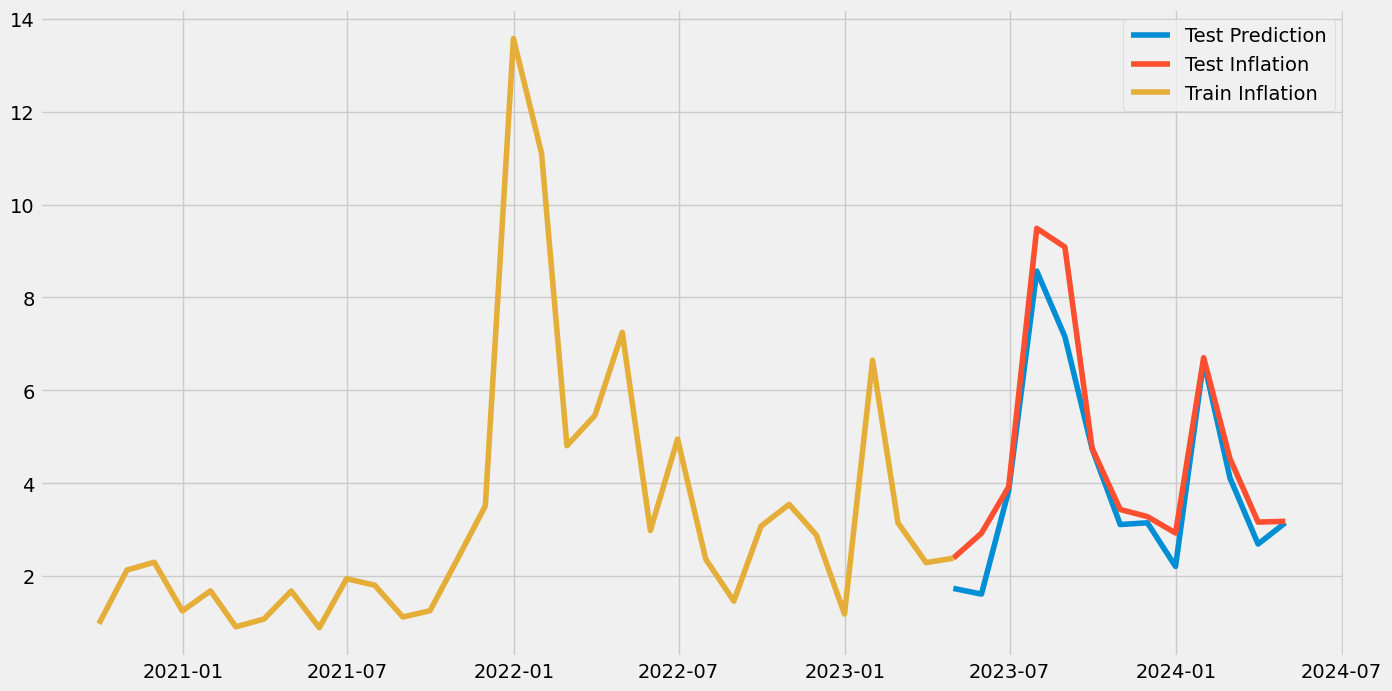

In [39]:
plt.figure(figsize=(15,8))
plt.plot(pd.DataFrame(scaler2.inverse_transform(np.array(model.predict(scaled_data.iloc[-14:-1,:-1])).reshape(-1,1))).set_index(data1.index[-14:-1]),label="Test Prediction")
plt.plot(data["TÜFE"].iloc[-14:-1],label="Test Inflation")
plt.plot(data["TÜFE"].iloc[-45:-13],label="Train Inflation")

plt.legend()

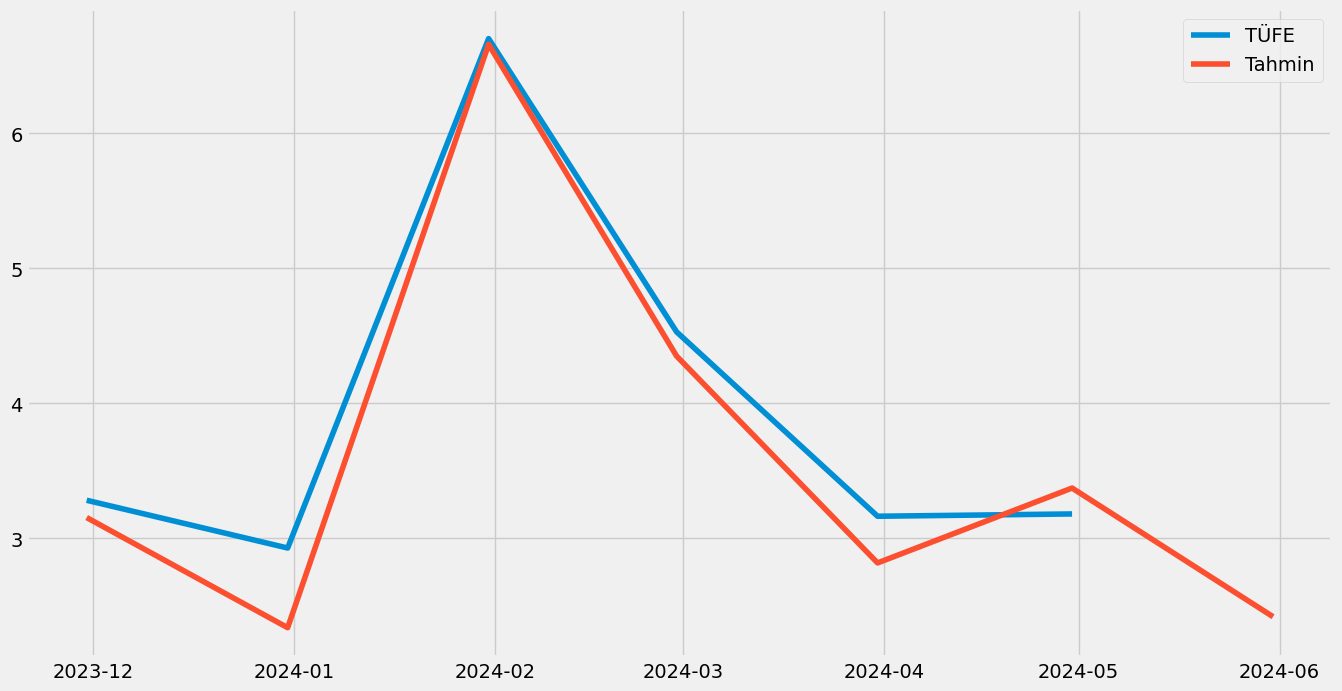

In [40]:
plt.figure(figsize=(15,8))
plt.plot(tahminler["TÜFE"].iloc[:-1],label="TÜFE")
plt.plot(tahminler["NN1"],label="Tahmin")
plt.legend()

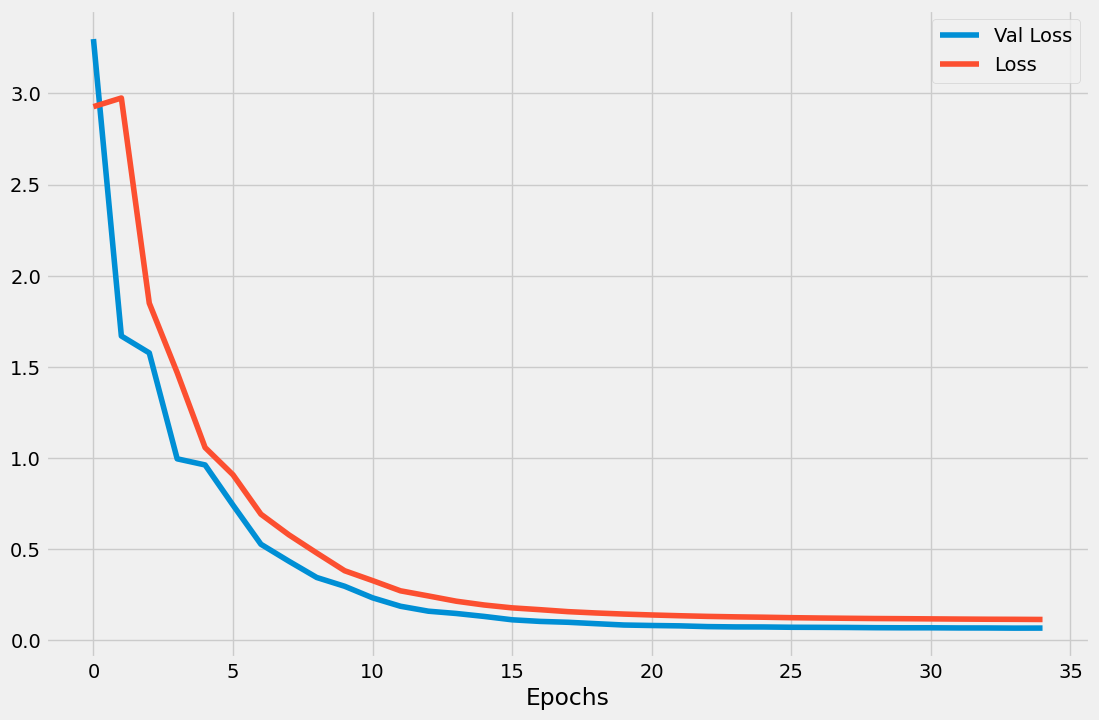

In [41]:
plt.figure(figsize=(12,8))
plt.plot(history.history["val_loss"],label="Val Loss")
plt.plot(history.history["loss"],label="Loss")
plt.xlabel("Epochs")
plt.legend()

In [43]:
kısatahminler=pd.concat([tahminler.iloc[-7:],tahminler2.iloc[-7:,1],tahminler3.iloc[-7:,1],tahminler4.iloc[-7:,1]],axis=1)
kısatahminler["Ortalama"]=kısatahminler.iloc[:,1:].mean(axis=1)
kısatahminler.iloc[-1,1:]+=0.66
kısatahminler

,TÜFE,NN1,NN2,NN3,NN4,Ortalama
2023-11-30,3.281097,3.153005,3.296402,3.366970,3.146819,3.240799
2023-12-31,2.927207,2.336637,2.232314,2.400017,2.207254,2.294055
2024-01-31,6.703310,6.660959,6.498575,4.893684,6.634337,6.171889
2024-02-29,4.529188,4.349838,3.998319,4.380088,4.114448,4.210673
2024-03-31,3.162671,2.816653,2.904265,2.907402,2.690414,2.829684
2024-04-30,3.179759,3.371770,3.231004,3.348546,3.148556,3.274969
2024-05-31,0.000000,3.077900,3.067568,3.330346,3.074191,3.137501


## Orta Vadeli Tahminler

In [34]:
model=auto_arima(pfaiz["Faiz"],seasonal=False,information_criterion="bic")
model_fit = model.fit(pfaiz["Faiz"])
faiztahmin = model_fit.predict(25)
faiztahmin=pd.DataFrame(faiztahmin)
faiztahmin.columns=["Faiz"]
row=pd.DataFrame({"Faiz":pfaiz.iloc[-4:,0]},index=pd.date_range(start="2024-02-28",periods=4,freq="1M"))
faiztahmin=pd.concat([row,faiztahmin],axis=0)

faiztahmin.iloc[4:,0]=[50,50,50,50,50,50,50,50,50,50,50,45,40,35,35,35,35,30,30,30,30,30,25,25,25]
faiztahmin

,Faiz
2024-02-29,45.239524
2024-03-31,47.287619
2024-04-30,51.357222
2024-05-31,50.599000
2024-06-30,50.000000
2024-07-31,50.000000
2024-08-31,50.000000
2024-09-30,50.000000
2024-10-31,50.000000
2024-11-30,50.000000


In [35]:
model=auto_arima(mfaiz["Mevduat Faizi"].loc[pfaiz.index[0]:],X=pfaiz,trace=False,seasonal=False,information_criterion="aic")
mfaiztahmin=pd.DataFrame(model.predict(26,X=faiztahmin[3:]))
mfaiztahmin.columns=["Mevduat Faizi"]
row=pd.DataFrame({"Mevduat Faizi":mfaiz.iloc[-2:,0]},index=pd.date_range(start="2024-04-28",periods=2,freq="1M"))
mfaiztahmin=pd.concat([row,mfaiztahmin],axis=0)
mfaiztahmin


,Mevduat Faizi
2024-04-30,67.567500
2024-05-31,66.640000
2024-06-30,63.619365
2024-07-31,66.120299
2024-08-31,67.203816
2024-09-30,64.189444
2024-10-31,65.105215
2024-11-30,67.995838
2024-12-31,66.336461
2025-01-31,64.699227


In [36]:
trainexog=pd.DataFrame()
trainexog["Dolar"]=usd.iloc[-16:-6,0].rolling(2).mean().dropna()*df14.iloc[:-6,0]
trainexog=trainexog.dropna()
trainexog=np.array(trainexog).reshape(-1,1)
testexog=pd.DataFrame()
testexog["Dolar"]=usd.iloc[-7:,0].rolling(2).mean().dropna()*df14.iloc[-6:,0]
testexog=testexog.dropna()
testexog=np.array(testexog).reshape(-1,1)

In [37]:
exog=pd.DataFrame()
exog["X"]=usd["USD/TL"].rolling(2).mean().dropna()*df14["Brent"]
exog=exog.dropna()
exog
#exog=np.array(exog).reshape(-1,1)


,X
2007-07-31,99.454046
2007-08-31,92.519699
2007-09-30,99.580871
2007-10-31,101.824103
2007-11-30,110.143119
...,...
2024-01-31,2341.408383
2024-02-29,2481.908203
2024-03-31,2656.218779
2024-04-30,2862.071302


In [38]:

zamtahmin=pd.DataFrame()
zamtahmin["Zam"]=[0,0,0,0,0,49.11,0,0,0,0,0,0,0,0,0,0,0,30,0,0,0,0,0,0,0,0,0,0,0,25]
zamtahmin.columns=["Zam"]
zamtahmin=zamtahmin.set_index(pd.date_range(start="2023-08-30",end="2026-02-27",freq="1M"))
zamtahmin

,Zam
2023-08-31,0.00
2023-09-30,0.00
2023-10-31,0.00
2023-11-30,0.00
2023-12-31,0.00
2024-01-31,49.11
2024-02-29,0.00
2024-03-31,0.00
2024-04-30,0.00
2024-05-31,0.00


In [39]:
faiztahmin.columns=["Faiz"]


In [40]:
exogtrain=pd.DataFrame()
exogtrain["Faiz"]=pfaiz["Faiz"].iloc[95:-13]
exogtrain=np.array(exogtrain).reshape(-1,1)

exogtest=pd.DataFrame()
exogtest=pd.concat([pfaiz["Faiz"].iloc[-14:-3],faiztahmin.iloc[2:,0]],axis=0)
exogtest=np.array(exogtest).reshape(-1,1)



In [41]:
exog=pfaiz["Faiz"].iloc[36:-2]
exog=np.array(exog).reshape(-1,1)

In [42]:
exogtest=faiztahmin.iloc[2:]
exogtest=np.array(exogtest).reshape(-1,1)

In [43]:
model=auto_arima(issizlik,seasonal=True,m=3,X=exog)
model_fit = model.fit(issizlik,X=exog)
issizliktahmin = model_fit.predict(27,X=exogtest)
issizliktahmin=pd.DataFrame(issizliktahmin)
issizliktahmin.columns=["İşsizlik"]
issizliktahmin

,İşsizlik
2024-04-30,8.598479
2024-05-31,8.548020
2024-06-30,8.539296
2024-07-31,8.551010
2024-08-31,8.537343
2024-09-30,8.533593
2024-10-31,8.536245
2024-11-30,8.533151
2024-12-31,8.532303
2025-01-31,8.532903


In [44]:
from prophet import Prophet

In [45]:
import optuna


In [46]:
"""import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.005, 10),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.01,0.99),
                'growth': trial.suggest_categorical('growth', ['linear']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,100),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"])

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=df6.index
    sn["y"]=df6.values
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"])
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=13,freq="M")
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(df6.values,predictions["yhat"][:-13])
    return mae_score
try:
    study = optuna.create_study(direction='minimize')
    study.optimize(objective, n_trials=1000)
    print("Optimize işlemi başarıyla tamamlandı.")
except Exception as e:
    print(f'Hata oluştu: {e}')
    print('Optimize işlemi başarısız oldu. Devam ediyor...')
"""

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.005, 10),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.01,0.99),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,100),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"])\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=df6.index\n    sn["y"]=df6.values\n    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],se

In [47]:
"""study.best_params"""

'study.best_params'

In [48]:
sn=pd.DataFrame()
sn["ds"]=usd.index
sn["y"]=usd.values
prophet=Prophet(growth="linear",changepoint_prior_scale=1.349638369822835,changepoint_range=0.9094193005763949,seasonality_prior_scale=9.159423931839974,n_changepoints=89,interval_width=0.70,yearly_seasonality=False,weekly_seasonality=False)
prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=26,freq="M")
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

14:51:35 - cmdstanpy - INFO - Chain [1] start processing
14:51:35 - cmdstanpy - INFO - Chain [1] done processing


In [49]:
usdtahmin=(predictions["yhat"][-27:].pct_change(periods=1)*100).dropna()
usdtahmin

ds
2024-06-30    2.372484
2024-07-31    2.394751
2024-08-31    2.338744
2024-09-30    2.211578
2024-10-31    2.235849
2024-11-30    2.116406
2024-12-31    2.141627
2025-01-31    2.096723
2025-02-28    1.854922
2025-03-31    2.016263
2025-04-30    1.912658
2025-05-31    1.939321
2025-06-30    1.841058
2025-07-31    1.868035
2025-08-31    1.833780
2025-09-30    1.742669
2025-10-31    1.769914
2025-11-30    1.683032
2025-12-31    1.710347
2026-01-31    1.681586
2026-02-28    1.493734
2026-03-31    1.629437
2026-04-30    1.551592
2026-05-31    1.578815
2026-06-30    1.504138
2026-07-31    1.531244
Name: yhat, dtype: float64

In [50]:
usdtahmin1 = []
result = usd.iloc[-1,0]
for i in range(len(usdtahmin)):
    result *= (1 + usdtahmin[i] / 100)
    usdtahmin1.append(result)

usdtahmin1 = np.array(usdtahmin1).reshape(-1, 1)
usdtahmin1 = pd.DataFrame(usdtahmin1)
usdtahmin1.columns = ["USD/TL"]
usdtahmin1=pd.concat([usd.iloc[-6:],usdtahmin1],axis=0)
usdtahmin1 = usdtahmin1.set_index(pd.date_range(start="2023-12-30", periods=len(usdtahmin1), freq="1M"))
usdtahmin1

,USD/TL
2023-12-31,29.074857
2024-01-31,30.053750
2024-02-29,30.759448
2024-03-31,31.986743
2024-04-30,32.329467
2024-05-31,32.245067
2024-06-30,33.010076
2024-07-31,33.800585
2024-08-31,34.591094
2024-09-30,35.356103


In [51]:
"""import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.001, 10),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.01,0.99),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.001,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,100),
                'growth':trial.suggest_categorical('growth',['linear'])
                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=df14[50:].index
    sn["y"]=df14[50:].values
    prophet=Prophet(**params)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=13,freq="M")
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(sn["y"],predictions["yhat"][:-13])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)"""

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.001, 10),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.01,0.99),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.001,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,100),\n                \'growth\':trial.suggest_categorical(\'growth\',[\'linear\'])\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=df14[50:].index\n    sn["y"]=df14[50:].values\n    prophet=Prophet(**params)\n    prophet.fit(sn)\n    future_dates=prophet.make_future_dataframe(periods=13,freq="M")\n    predictions=prophet.predict(future_dates)\n    predictions=predictions.set_index(predictions["ds"])\n    \n    mae_score = mean_squared_error(sn["y"],predictions["yhat"][:-13])\n    return mae_score\nstudy = optuna.create_study(direction=

In [52]:
"""study.best_params"""

'study.best_params'

In [53]:
sn=pd.DataFrame()
sn["ds"]=df14.index
sn["y"]=df14.values
prophet=Prophet(growth="linear",changepoint_prior_scale=9.333547662504625,changepoint_range=0.9362159367416,seasonality_prior_scale=2.378940289163559,n_changepoints=98)
prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=25,freq="M")
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

14:51:36 - cmdstanpy - INFO - Chain [1] start processing
14:51:36 - cmdstanpy - INFO - Chain [1] done processing


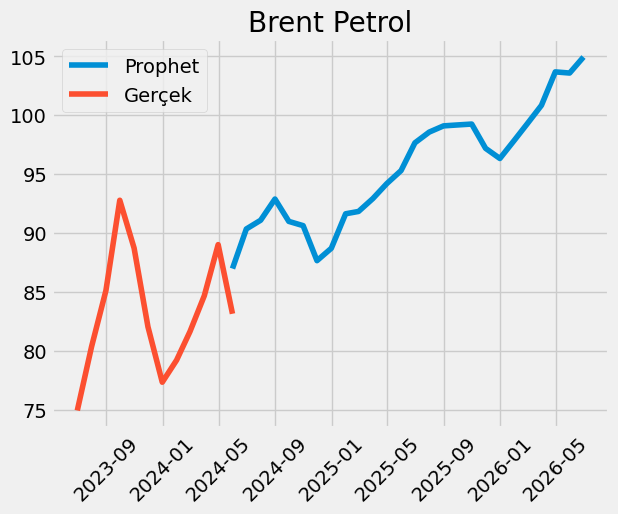

In [54]:
plt.title("Brent Petrol")
plt.plot(predictions["yhat"][-26:],label="Prophet")
plt.plot(df14["Brent"][-12:],label="Gerçek")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [55]:
brenttahmin=predictions["yhat"][-29:]
brenttahmin

ds
2024-02-29     84.423910
2024-03-31     85.040562
2024-04-30     84.691430
2024-05-31     86.966945
2024-06-30     90.328699
2024-07-31     91.070043
2024-08-31     92.868855
2024-09-30     90.971259
2024-10-31     90.610610
2024-11-30     87.639415
2024-12-31     88.690470
2025-01-31     91.616968
2025-02-28     91.815993
2025-03-31     92.908820
2025-04-30     94.171869
2025-05-31     95.281071
2025-06-30     97.637623
2025-07-31     98.549059
2025-08-31     99.076523
2025-09-30     99.154498
2025-10-31     99.230940
2025-11-30     97.171470
2025-12-31     96.308594
2026-01-31     97.839368
2026-02-28     99.242484
2026-03-31    100.818820
2026-04-30    103.657400
2026-05-31    103.559984
2026-06-30    104.918073
Name: yhat, dtype: float64

In [56]:
enf_belirsizlik

,Enflasyon Belirsizliği
2013-01-31,0.32
2013-02-28,0.22
2013-03-31,0.16
2013-04-30,0.26
2013-05-31,0.29
...,...
2024-01-31,1.21
2024-02-29,0.94
2024-03-31,0.64
2024-04-30,0.55


In [57]:
"""import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.001, 10),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.01,0.99),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.001,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,50),
                'growth':trial.suggest_categorical('growth',['linear'])

            

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=enf_belirsizlik.index
    sn["y"]=enf_belirsizlik.values
    prophet=Prophet(**params)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=13,freq="M")
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(sn["y"],predictions["yhat"][:-13])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)"""

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.001, 10),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.01,0.99),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.001,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,50),\n                \'growth\':trial.suggest_categorical(\'growth\',[\'linear\'])\n\n            \n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=enf_belirsizlik.index\n    sn["y"]=enf_belirsizlik.values\n    prophet=Prophet(**params)\n    prophet.fit(sn)\n    future_dates=prophet.make_future_dataframe(periods=13,freq="M")\n    predictions=prophet.predict(future_dates)\n    predictions=predictions.set_index(predictions["ds"])\n    \n    mae_score = mean_squared_error(sn["y"],predictions["yhat"][:-13])\n    return mae_score\nstudy = o

In [58]:
usdtahmin1

,USD/TL
2023-12-31,29.074857
2024-01-31,30.053750
2024-02-29,30.759448
2024-03-31,31.986743
2024-04-30,32.329467
2024-05-31,32.245067
2024-06-30,33.010076
2024-07-31,33.800585
2024-08-31,34.591094
2024-09-30,35.356103


In [59]:
usdtahmin1.pct_change().iloc[5:17]

,USD/TL
2024-05-31,-0.002611
2024-06-30,0.023725
2024-07-31,0.023948
2024-08-31,0.023387
2024-09-30,0.022116
2024-10-31,0.022358
2024-11-30,0.021164
2024-12-31,0.021416
2025-01-31,0.020967
2025-02-28,0.018549


14:51:37 - cmdstanpy - INFO - Chain [1] start processing
14:51:37 - cmdstanpy - INFO - Chain [1] done processing


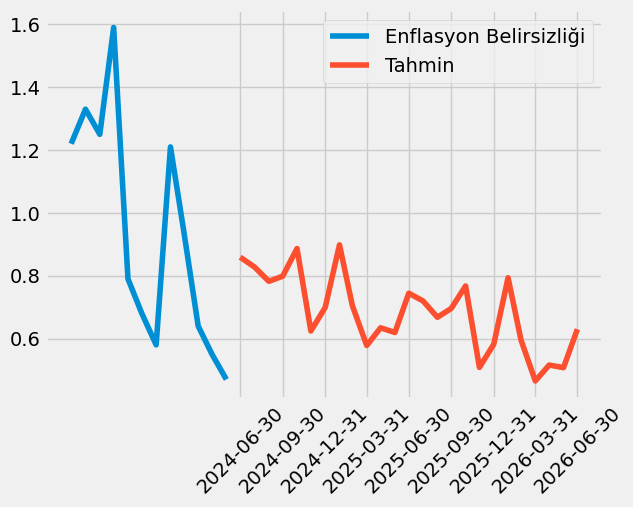

In [60]:
sn=pd.DataFrame()
sn["ds"]=enf_belirsizlik.index
sn["y"]=enf_belirsizlik.values
prophet=Prophet(changepoint_prior_scale=1.7,changepoint_range=0.91,seasonality_prior_scale=0.1053403857042852,n_changepoints=44,growth="linear")
prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=25,freq="M")
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])
plt.plot(enf_belirsizlik[-12:],label="Enflasyon Belirsizliği")
plt.plot(predictions["yhat"][-25:],label="Tahmin")
plt.xticks(predictions.index[-25::3],rotation=45)
plt.legend()

In [61]:
enfbelirsizliktahmin1=pd.DataFrame(predictions["yhat"][-26:])
enfbelirsizliktahmin1.columns=["Enflasyon Belirsizliği"]
enfbelirsizliktahmin1.index.names=[""]
enfbelirsizliktahmin1.iloc[0,0]=enf_belirsizlik.iloc[-1,0]
enfbelirsizliktahmin1

,Enflasyon Belirsizliği
,
2024-05-31,0.470000
2024-06-30,0.859019
2024-07-31,0.827703
2024-08-31,0.782257
2024-09-30,0.798574
2024-10-31,0.886604
2024-11-30,0.624219
2024-12-31,0.698910
2025-01-31,0.898333


In [62]:
'''import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.005, 5),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.1,0.9),
                'growth': trial.suggest_categorical('growth', ['linear', 'logistic']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',[0.01,10]),
                'n_changepoints':trial.suggest_int('n_changepoints',1,25),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),
                'm':trial.suggest_int('m',0,110),
                'cap':trial.suggest_float('cap',0,200)

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=perakende1["Mevsimsellikten ve Takvimden Arındırılmış"][params["m"]:-12].index
    sn["y"]=perakende1["Mevsimsellikten ve Takvimden Arındırılmış"][params["m"]:-12].values
    sn["cap"]=params["cap"]
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=12,freq="M")
    future_dates["cap"]=params["cap"]
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(perakende1["Mevsimsellikten ve Takvimden Arındırılmış"][-12:],predictions["yhat"].tail(12))
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)'''

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.005, 5),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.1,0.9),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\', \'logistic\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',[0.01,10]),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,25),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n                \'m\':trial.suggest_int(\'m\',0,110),\n                \'cap\':trial.suggest_float(\'cap\',0,200)\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=perakende1["Mevsimsellikten ve Takvimden Arındırılmış"][p

In [63]:
#study.best_params

In [64]:
((usdtahmin1[2:-2].pct_change(periods=1)*100).dropna())

,USD/TL
2024-03-31,3.989978
2024-04-30,1.071456
2024-05-31,-0.261062
2024-06-30,2.372484
2024-07-31,2.394751
2024-08-31,2.338744
2024-09-30,2.211578
2024-10-31,2.235849
2024-11-30,2.116406
2024-12-31,2.141627


In [65]:
brenttahmin1=(brenttahmin.pct_change()*100).dropna()
brenttahmin1

ds
2024-03-31    0.730424
2024-04-30   -0.410547
2024-05-31    2.686830
2024-06-30    3.865553
2024-07-31    0.820719
2024-08-31    1.975196
2024-09-30   -2.043307
2024-10-31   -0.396443
2024-11-30   -3.279080
2024-12-31    1.199294
2025-01-31    3.299676
2025-02-28    0.217235
2025-03-31    1.190236
2025-04-30    1.359450
2025-05-31    1.177849
2025-06-30    2.473264
2025-07-31    0.933488
2025-08-31    0.535230
2025-09-30    0.078702
2025-10-31    0.077094
2025-11-30   -2.075432
2025-12-31   -0.887994
2026-01-31    1.589447
2026-02-28    1.434102
2026-03-31    1.588368
2026-04-30    2.815526
2026-05-31   -0.093979
2026-06-30    1.311403
Name: yhat, dtype: float64

In [66]:
motorintahmin=pd.DataFrame((1+(((usdtahmin1[2:-2].pct_change(periods=1)*100).dropna())/100)).values*(1+(((brenttahmin1[:-1]).dropna())/100)).values.reshape(-1,1))
motorintahmin.columns=["Motorin"]
motorintahmin=motorintahmin.set_index(pd.date_range(start="2024-02-28",periods=len(motorintahmin),freq="1M"))
motorintahmin.iloc[0,0]=(motorin.pct_change(periods=1)*100).iloc[-1,0]
motorintahmin[1:]=((motorintahmin[1:])-1)*100
motorintahmin

,Motorin
2024-02-29,1.038146
2024-03-31,0.656510
2024-04-30,2.418754
2024-05-31,6.329746
2024-06-30,3.235124
2024-07-31,4.360135
2024-08-31,0.123082
2024-09-30,1.830542
2024-10-31,-1.232073
2024-11-30,3.366606


In [67]:
"""import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.005, 5),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.01,0.99),
                'growth': trial.suggest_categorical('growth', ['linear']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,100),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=money["Para Arzi"].index
    sn["y"]=money["Para Arzi"].values
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=13,freq="M")
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(money["Para Arzi"],predictions["yhat"][:-13])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)"""

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.005, 5),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.01,0.99),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,100),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=money["Para Arzi"].index\n    sn["y"]=money["Para Arzi"].values\n    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_rang

In [68]:
"""study.best_params"""

'study.best_params'

In [69]:
sn=pd.DataFrame()
sn["ds"]=money["Para Arzi"].index
sn["y"]=money["Para Arzi"].values
prophet=Prophet(changepoint_prior_scale=1.5034897796889,changepoint_range=0.8529543315216538,growth='linear',seasonality_prior_scale=2.453031163229546,n_changepoints=10,yearly_seasonality="auto",weekly_seasonality=True)
prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=25,freq="M")
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

14:51:38 - cmdstanpy - INFO - Chain [1] start processing
14:51:38 - cmdstanpy - INFO - Chain [1] done processing


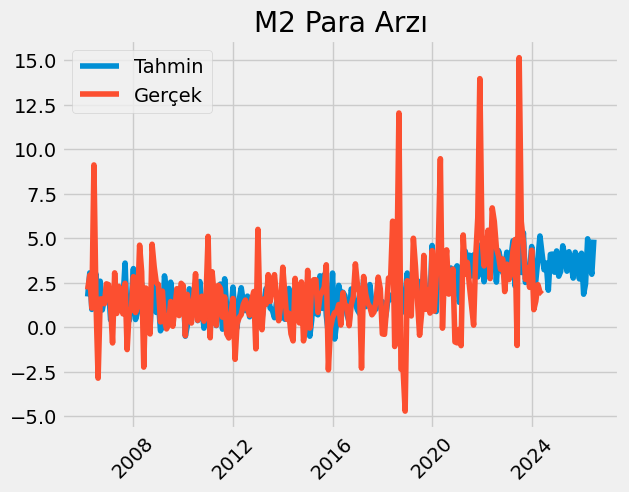

In [70]:
plt.title("M2 Para Arzı")
plt.plot(predictions["yhat"],label="Tahmin")
plt.plot(money["Para Arzi"],label="Gerçek")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [71]:
paraarzitahmin=(predictions["yhat"]).tail(25)
paraarzitahmin

ds
2024-06-30    3.235643
2024-07-31    3.611035
2024-08-31    2.084948
2024-09-30    4.094256
2024-10-31    4.114656
2024-11-30    3.095676
2024-12-31    4.288930
2025-01-31    2.871038
2025-02-28    3.141043
2025-03-31    4.577866
2025-04-30    3.989185
2025-05-31    3.152917
2025-06-30    4.246946
2025-07-31    3.534101
2025-08-31    2.765525
2025-09-30    4.218714
2025-10-31    3.859548
2025-11-30    2.719490
2025-12-31    4.159747
2026-01-31    1.858592
2026-02-28    2.439519
2026-03-31    4.972101
2026-04-30    3.618206
2026-05-31    2.980513
2026-06-30    4.924390
Name: yhat, dtype: float64

In [72]:
paraarzitahmin1 = paraarzitahmin
paraarzitahmin1 = np.array(paraarzitahmin1).reshape(-1, 1)
paraarzitahmin1 = pd.DataFrame(paraarzitahmin1)
paraarzitahmin1.columns = ["Para Arzi"]
paraarzitahmin1 = paraarzitahmin1.set_index(pd.date_range(start="2024-06-30", periods=len(paraarzitahmin), freq="1M"))
row=pd.DataFrame({"Para Arzi":money.iloc[-4:,0]},index=pd.date_range(start="2024-02-28",periods=4,freq="M"))
paraarzitahmin1=pd.concat([row,paraarzitahmin1])
paraarzitahmin1

,Para Arzi
2024-02-29,1.467195
2024-03-31,2.396667
2024-04-30,1.982216
2024-05-31,1.869716
2024-06-30,3.235643
2024-07-31,3.611035
2024-08-31,2.084948
2024-09-30,4.094256
2024-10-31,4.114656
2024-11-30,3.095676


In [73]:
'''import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.005, 5),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.1,0.9),
                'growth': trial.suggest_categorical('growth', ['linear', 'logistic']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,25),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),
                'm':trial.suggest_int('m',0,110),
                'cap':trial.suggest_float('cap',0,200)

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=borc["Borç"][params["m"]:-12].index
    sn["y"]=borc["Borç"][params["m"]:-12].values
    sn["cap"]=params["cap"]
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=12,freq="M")
    future_dates["cap"]=params["cap"]
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(borc["Borç"][-12:],predictions["yhat"][-12:])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)'''

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.005, 5),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.1,0.9),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\', \'logistic\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,25),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n                \'m\':trial.suggest_int(\'m\',0,110),\n                \'cap\':trial.suggest_float(\'cap\',0,200)\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=borc["Borç"][params["m"]:-12].index\n    sn["y"]=borc["Borç

In [74]:
#study.best_params

In [75]:
"""import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.001, 5),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.01,0.99),
                'growth': trial.suggest_categorical('growth', ['linear']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,5),
                'n_changepoints':trial.suggest_int('n_changepoints',1,200),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),


                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=df3["Kredi"].index
    sn["y"]=df3["Kredi"].values
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=13,freq="M")
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(df3.values,predictions["yhat"][:-13])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)"""

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.001, 5),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.01,0.99),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,5),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,200),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=df3["Kredi"].index\n    sn["y"]=df3["Kredi"].values\n    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=

In [76]:
"""study.best_params"""

'study.best_params'

In [77]:
sn=pd.DataFrame()
sn["ds"]=kredi["Kredi"].index
sn["y"]=kredi["Kredi"].values
prophet=Prophet(changepoint_prior_scale=30.99759561372614,changepoint_range=0.872589785485153,growth="linear",seasonality_prior_scale=3.534157847860739,n_changepoints=189,yearly_seasonality=True,weekly_seasonality=True)

prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=25,freq="M")
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

14:51:39 - cmdstanpy - INFO - Chain [1] start processing
14:51:40 - cmdstanpy - INFO - Chain [1] done processing


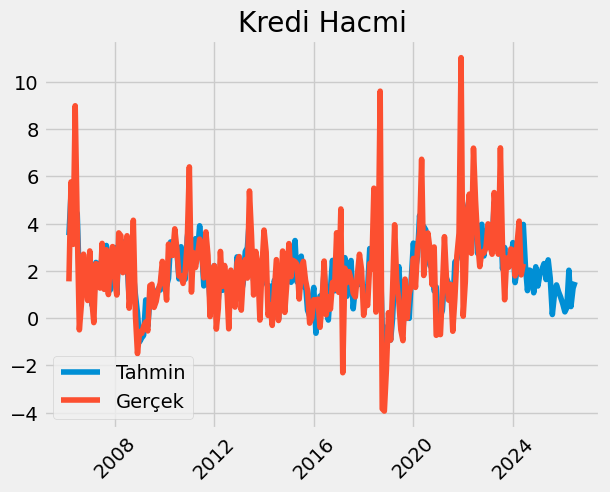

In [78]:
plt.title("Kredi Hacmi")
plt.plot(predictions["yhat"],label="Tahmin")
plt.plot(kredi["Kredi"],label="Gerçek")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [79]:
kreditahmin=(predictions["yhat"]).tail(25)
kreditahmin

ds
2024-06-30    2.258276
2024-07-31    1.166961
2024-08-31    2.035126
2024-09-30    1.984178
2024-10-31    1.076187
2024-11-30    2.176461
2024-12-31    1.361780
2025-01-31    1.891703
2025-02-28    2.064405
2025-03-31    2.311395
2025-04-30    1.636342
2025-05-31    2.469764
2025-06-30    1.697123
2025-07-31    0.156024
2025-08-31    1.009874
2025-09-30    1.409177
2025-10-31    1.111105
2025-11-30    0.887769
2025-12-31    0.610536
2026-01-31    0.268535
2026-02-28    0.438857
2026-03-31    2.030106
2026-04-30    0.491806
2026-05-31    1.269437
2026-06-30    1.534309
Name: yhat, dtype: float64

In [80]:
kreditahmin1 = kreditahmin

kreditahmin1 = np.array(kreditahmin1).reshape(-1, 1)
kreditahmin1 = pd.DataFrame(kreditahmin1)
kreditahmin1.columns = ["Kredi"]
kreditahmin1 = kreditahmin1.set_index(pd.date_range(start="2024-06-30", periods=len(kreditahmin1), freq="1M"))
row=pd.DataFrame({"Kredi":kredi.iloc[-4:,0]},index=pd.date_range(start="2024-02-28",periods=4,freq="1M"))
kreditahmin1=pd.concat([row,kreditahmin1],axis=0)
kreditahmin1

,Kredi
2024-02-29,3.130261
2024-03-31,4.108658
2024-04-30,1.832087
2024-05-31,2.301388
2024-06-30,2.258276
2024-07-31,1.166961
2024-08-31,2.035126
2024-09-30,1.984178
2024-10-31,1.076187
2024-11-30,2.176461


In [81]:
"""import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.005, 10),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.01,0.99),
                'growth': trial.suggest_categorical('growth', ['linear']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,150),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=m3["M3"].index
    sn["y"]=m3["M3"].values
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=12,freq="M")
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(m3["M3"],predictions["yhat"][:-12])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)"""

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.005, 10),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.01,0.99),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,150),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=m3["M3"].index\n    sn["y"]=m3["M3"].values\n    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["

In [82]:
sn=pd.DataFrame()
sn["ds"]=m3["M3"].index
sn["y"]=m3["M3"].values
prophet=Prophet(changepoint_prior_scale=1.79369153471077,changepoint_range=0.9052396316775,growth='linear',seasonality_prior_scale=6.7636997959024185,n_changepoints=143,yearly_seasonality=True,weekly_seasonality=True)
prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=13,freq="M")
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

14:51:41 - cmdstanpy - INFO - Chain [1] start processing
14:51:41 - cmdstanpy - INFO - Chain [1] done processing


In [83]:
(predictions["yhat"].tail(13))

ds
2024-06-30    2.725278
2024-07-31    3.111896
2024-08-31    1.877211
2024-09-30    3.446781
2024-10-31    3.931071
2024-11-30    2.852285
2024-12-31    2.927648
2025-01-31    1.638958
2025-02-28    2.136935
2025-03-31    3.584852
2025-04-30    2.995158
2025-05-31    2.595482
2025-06-30    3.109746
Name: yhat, dtype: float64

In [84]:
m3tahmin=(predictions["yhat"].tail(13))


m3tahmin1 = np.array(m3tahmin).reshape(-1, 1)
m3tahmin1 = pd.DataFrame(m3tahmin1)
m3tahmin1.columns = ["M3"]
m3tahmin1 = m3tahmin1.set_index(pd.date_range(start="2024-06-28", periods=len(m3tahmin1), freq="1M"))
row=pd.DataFrame({"M3":m3.iloc[-4:,0]},index=pd.date_range(start="2024-02-28",periods=4,freq="1M"))
m3tahmin1=pd.concat([row,m3tahmin1],axis=0)
m3tahmin1

,M3
2024-02-29,2.359600
2024-03-31,2.687835
2024-04-30,2.405048
2024-05-31,2.497374
2024-06-30,2.725278
2024-07-31,3.111896
2024-08-31,1.877211
2024-09-30,3.446781
2024-10-31,3.931071
2024-11-30,2.852285


In [85]:
'''import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.001, 10),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.1,0.9),
                'growth': trial.suggest_categorical('growth', ['linear', 'logistic']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,25),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),
                'cap':trial.suggest_float('cap',0,400)

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=sanayi["Sanayi"].index
    sn["y"]=sanayi["Sanayi"].values
    sn["cap"]=params["cap"]
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=15,freq="M")
    future_dates["cap"]=params["cap"]
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(sanayi["Sanayi"],predictions["yhat"][:-15])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=2000)'''

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.001, 10),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.1,0.9),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\', \'logistic\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,25),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n                \'cap\':trial.suggest_float(\'cap\',0,400)\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=sanayi["Sanayi"].index\n    sn["y"]=sanayi["Sanayi"].values\n    sn["cap"]=params["cap"]\n    prophet=Prophet(cha

In [86]:
#study.best_params

In [87]:
"""def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.001, 10),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.01,0.99),
                'growth': trial.suggest_categorical('growth', ['linear', 'logistic']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,50),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),
                'cap':trial.suggest_int('cap',0,400)

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=redkt["REDKT"].index
    sn["y"]=redkt["REDKT"].values
    sn["cap"]=params["cap"]
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=36,freq="M")
    future_dates["cap"]=params["cap"]
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(redkt["REDKT"],predictions["yhat"][:-36])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)"""

'def objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.001, 10),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.01,0.99),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\', \'logistic\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,50),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n                \'cap\':trial.suggest_int(\'cap\',0,400)\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=redkt["REDKT"].index\n    sn["y"]=redkt["REDKT"].values\n    sn["cap"]=params["cap"]\n    prophet=Prophet(changepoint_prior_scal

In [98]:
import statsmodels.api as sm
tahmindf=pd.DataFrame()
tahmindf=pd.concat([usdtahmin1["USD/TL"].rolling(3).mean()],axis=1)

tahmindf=tahmindf.pct_change(periods=1)*100
tahmindf["M3"]=m3tahmin1.shift(1)
tahmindf["Para Arzi"]=paraarzitahmin1.shift(1)
tahmindf["Enflasyon Belirsizliği"]=enfbelirsizliktahmin1["Enflasyon Belirsizliği"]
tahmindf["Kredi"]=kreditahmin1["Kredi"].rolling(3).mean()
tahmindf["Zam"]=zamtahmin["Zam"]
tahmindf["Motorin"]=motorintahmin["Motorin"]
tahmindf["Mevduat Faizi"]=mfaiztahmin["Mevduat Faizi"]
tahmindf["İşsizlik"]=issizliktahmin
tahmindf["Politika Faizi"]=faiztahmin["Faiz"]




tahmindf=tahmindf[['USD/TL', 'Motorin', 'Zam',
       'Enflasyon Belirsizliği', 'Para Arzi', 'M3', 'Kredi', 'Mevduat Faizi','İşsizlik','Politika Faizi']]

tahmindf.columns=["USD/TL","Motorin","Zam","Enflasyon Belirsizliği",'ParaArzi','M3', 'Kredi', 'Mevduat Faizi','İşsizlik','Politika Faizi']
tahmindf=tahmindf.dropna()
tahmindf.iloc[0,1]=-3.37

tahmindf

,USD/TL,Motorin,Zam,Enflasyon Belirsizliği,ParaArzi,M3,Kredi,Mevduat Faizi,İşsizlik,Politika Faizi
2024-05-31,1.562565,-3.370000,0.0,0.470000,1.982216,2.405048,2.747378,66.640000,8.548020,50.599
2024-06-30,1.059775,3.235124,0.0,0.859019,1.869716,2.497374,2.130584,63.619365,8.539296,50.000
2024-07-31,1.507531,4.360135,0.0,0.827703,3.235643,2.725278,1.908875,66.120299,8.551010,50.000
2024-08-31,2.368391,0.123082,0.0,0.782257,3.611035,3.111896,1.820121,67.203816,8.537343,50.000
2024-09-30,2.313596,1.830542,0.0,0.798574,2.084948,1.877211,1.728755,64.189444,8.533593,50.000
2024-10-31,2.261280,-1.232073,0.0,0.886604,4.094256,3.446781,1.698497,65.105215,8.536245,50.000
2024-11-30,2.187241,3.366606,0.0,0.624219,4.114656,3.931071,1.745608,67.995838,8.533151,50.000
2024-12-31,2.163946,5.465584,0.0,0.698910,3.095676,2.852285,1.538142,66.336461,8.532303,50.000
2025-01-31,2.118111,2.076187,30.0,0.898333,4.288930,2.927648,1.809981,64.699227,8.532903,50.000
2025-02-28,2.029087,3.230498,0.0,0.704154,2.871038,1.638958,1.772629,67.206590,8.532203,50.000


In [99]:
data["TÜFE Lag"]=(enf.pct_change()*100).shift(1).dropna()["TÜFE"]
tahmindf["TÜFE Lag"]=0
tahmindf["TÜFE Lag"].iloc[0]=data["TÜFE"].iloc[-2]

In [100]:
data.loc["2023-06-30","TÜFE Lag"]=data.loc["2023-05-31","TÜFE"]

In [101]:
data=data.dropna()

In [102]:
data1=pd.concat([data,tahmindf],axis=0)
data1

,USD/TL,Motorin,M3,Enflasyon Belirsizliği,Zam,TÜFEt-1,ParaArzi,Kredi,Anket,İhracat,...,Mevduat Faizi,İşsizlik,Politika Faizi,ÜFEt2,TÜFECt2,ÜFEt1,TÜFECt1,İTO,TÜFE,TÜFE Lag
2014-01-31,3.732429,2.881984,3.413428,0.370000,5.265777,0.460607,3.375162,2.886648,1.06,-7.844611,...,9.022000,9.200000,7.503636,1.106494,0.625859,3.319203,-0.111246,0.333618,1.978080,0.460607
2014-02-28,3.033477,1.685899,1.958423,0.310000,0.000000,1.978080,1.804994,2.214819,0.69,-6.175956,...,10.627500,9.500000,10.070500,3.319203,-0.111246,1.383675,0.308798,1.009554,0.428192,1.978080
2014-03-31,2.465778,-2.278097,0.229599,0.160000,0.000000,0.428192,0.451349,1.160171,0.65,4.991889,...,11.312500,9.500000,10.200952,1.383675,0.308798,0.736212,0.701489,0.989257,1.125608,0.428192
2014-04-30,-1.344724,-6.214384,0.730196,0.230000,0.000000,1.125608,0.796760,0.126575,0.76,12.575902,...,11.020000,9.700000,10.046190,0.736212,0.701489,0.085477,1.197755,2.649799,1.344970,1.125608
2014-05-31,-1.859714,-0.561578,-0.093468,0.260000,0.000000,1.344970,-0.362357,0.464970,0.63,-7.919312,...,10.494000,9.700000,9.891000,0.085477,1.197755,-0.520967,2.119546,0.211698,0.395224,1.344970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-28,2.029087,3.230498,1.638958,0.704154,0.000000,NaN,2.871038,1.772629,NaN,NaN,...,67.206590,8.532203,50.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
2025-03-31,1.988734,3.298110,2.136935,0.578051,0.000000,NaN,3.141043,2.089168,NaN,NaN,...,68.127124,8.532011,50.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
2025-04-30,1.928288,3.140012,3.584852,0.634337,0.000000,NaN,4.577866,2.004047,NaN,NaN,...,65.933262,8.532146,50.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
2025-05-31,1.955577,4.359856,2.995158,0.619335,0.000000,NaN,3.989185,2.139167,NaN,NaN,...,66.301326,8.597442,45.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


In [103]:
features=['USD/TL','Motorin','M3','Enflasyon Belirsizliği', 'Kredi','İşsizlik','TÜFE']
data1=data1[features]


In [104]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data1.iloc[:,:-1])
scaled_data=pd.DataFrame(scaled_data,columns=data1.columns[:-1])
scaler = StandardScaler()
scaled_data["TÜFE"]=scaler.fit_transform(np.array(data1["TÜFE"]).reshape(-1, 1))
scaled_data=scaled_data.iloc[1:,:]
scaled_data

,USD/TL,Motorin,M3,Enflasyon Belirsizliği,Kredi,İşsizlik,TÜFE
1,0.242231,-0.056323,-0.157973,-0.615743,0.205902,-0.831453,-0.647369
2,0.064206,-0.616351,-0.852285,-1.008941,-0.549936,-0.831453,-0.338856
3,-1.130731,-1.172465,-0.651240,-0.825449,-1.290687,-0.706871,-0.241817
4,-1.292227,-0.373843,-0.982031,-0.746809,-1.048169,-0.706871,-0.661953
5,-1.206334,0.093967,-1.147326,-0.589530,-0.591203,-0.706871,-0.699304
...,...,...,...,...,...,...,...
133,-0.072736,0.161896,-0.286273,0.417461,-0.111004,-1.434305,NaN
134,-0.085391,0.171449,-0.086281,0.086906,0.115851,-1.434425,NaN
135,-0.104346,0.149113,0.495216,0.234451,0.054847,-1.434340,NaN
136,-0.095788,0.321451,0.258390,0.195125,0.151684,-1.393667,NaN


In [105]:
from sklearn.model_selection import train_test_split
X=scaled_data
X=X.iloc[:-14,:-1]
y=scaled_data["TÜFE"][:-14]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=scaled_data.columns[:-1])
y=pd.DataFrame(y,columns=["TÜFE"])
X_train,X_test=X.iloc[:-12,:],X.iloc[-12:,:]
y_train,y_test=y[:-12],y[-12:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.05,random_state=42)


In [106]:
import optuna
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,GRU,SimpleRNN
import keras
from keras.callbacks import EarlyStopping
from keras import regularizers
from keras.layers import LSTM, Dense, Dropout
from keras.regularizers import l2
def objective(trial):
    # Define hyperparameters to be optimized
    learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-1)
    units1 = trial.suggest_int('units1', 1, 128)
    batch_size = trial.suggest_int('batch_size', 2, 64)
    activation1 = trial.suggest_categorical('activation1', ['tanh','selu'])
    optimizer = trial.suggest_categorical('optimizer', ['adam'])
    rlrate=trial.suggest_float('rlrate',0.001,0.999)
    rlrate2=trial.suggest_float('rlrate2',0.001,0.999)
    keras.utils.set_random_seed(42)
    early_stopping = EarlyStopping(monitor='val_loss', patience=1, restore_best_weights=True)
    model = Sequential()   
    model.add(Dense(units=units1,activation=activation1,input_dim=(X_train.shape[1]),kernel_regularizer=l2(rlrate)))
    model.add(Dense(units=units1,activation=activation1,input_dim=(X_train.shape[1]),kernel_regularizer=l2(rlrate2)))
    model.add(Dense(units=1))

    if optimizer == 'adam':
       optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
       optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
    elif optimizer == 'SGD':
       optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)  

    

    

    model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])

    # Train model
    model.fit(X_train, y_train, epochs=1000, batch_size=batch_size,callbacks=[early_stopping],verbose=0,validation_data=(X_val,y_val))

    # Evaluate model
    y_pred = model.predict(X_test)
    mse = mean_squared_error(scaler.inverse_transform(y_test), scaler.inverse_transform(y_pred))

    return mse  # Return validation accuracy as the objective


In [ ]:
"""study = optuna.create_study(direction='minimize')  # or 'minimize' depending on your objective
study.optimize(objective, n_trials=2000)  # You can adjust the number of trials

# Print the best hyperparameters
print('Best hyperparameters:', study.best_params)"""

"study = optuna.create_study(direction='minimize')  # or 'minimize' depending on your objective\nstudy.optimize(objective, n_trials=2000)  # You can adjust the number of trials\n\n# Print the best hyperparameters\nprint('Best hyperparameters:', study.best_params)"

In [107]:
from sklearn.model_selection import train_test_split
data1=pd.concat([data,tahmindf],axis=0)
features=['USD/TL','Motorin','M3','Enflasyon Belirsizliği', 'Kredi','İşsizlik','TÜFE']
data1=data1[features]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data1.iloc[:,:-1])
scaled_data=pd.DataFrame(scaled_data,columns=data1.columns[:-1])
scaler = StandardScaler()
scaled_data["TÜFE"]=scaler.fit_transform(np.array(data1["TÜFE"]).reshape(-1, 1))
scaled_data=scaled_data.iloc[1:,:]
X=scaled_data
X=X.iloc[:-15,:-1]
y=scaled_data["TÜFE"][:-15]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X_train,X_test=X[:-12,:],X[-12:,:]
y_train,y_test=y[:-12],y[-12:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.05,random_state=42)

In [108]:
import keras
from keras import Sequential
from keras import regularizers
from keras.layers import LSTM, Dense, Dropout,SimpleRNN
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
from keras.regularizers import l2
keras.utils.set_random_seed(42)
model = Sequential()
model.add(Dense(units=3,activation="selu",input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.11064517951376238)))
model.add(Dense(units=3,activation="selu",input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.7726924049252087)))
model.add(Dense(1))
optimizer = keras.optimizers.Adam(learning_rate=0.025721829128366083)
model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model.fit(X_train, y_train, epochs=1000, batch_size=3,verbose=1,validation_data=(X_val,y_val),callbacks=[early_stopping])

Epoch 1/1000
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 2.3490 - mean_squared_error: 0.4523 - val_loss: 0.5968 - val_mean_squared_error: 0.1858
Epoch 2/1000
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5820 - mean_squared_error: 0.2606 - val_loss: 0.3948 - val_mean_squared_error: 0.1111
Epoch 3/1000
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4607 - mean_squared_error: 0.1980 - val_loss: 0.3561 - val_mean_squared_error: 0.1068
Epoch 4/1000
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4176 - mean_squared_error: 0.1855 - val_loss: 0.3606 - val_mean_squared_error: 0.0991


In [109]:
pred1=model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


In [110]:
mean_squared_error(scaler.inverse_transform(y_test),scaler.inverse_transform(model.predict(X_test)))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


0.8480902257203313

In [111]:
pred=scaler.inverse_transform(model.predict(np.array(scaled_data.iloc[-14:,:-1])))
pred=pd.DataFrame(pred)
pred.columns=["TÜFE"]
pred=pred.set_index(pd.date_range(start="2024-05-28",periods=14,freq="1M"))
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


,TÜFE
2024-05-31,1.803435
2024-06-30,3.339113
2024-07-31,3.408543
2024-08-31,3.129872
2024-09-30,3.063766
2024-10-31,3.260784
2024-11-30,3.160279
2024-12-31,3.254182
2025-01-31,3.464646
2025-02-28,2.910598


In [112]:
tüfetahmin1 = []
result = enf["TÜFE"].iloc[-1]
pred=np.array(pred).reshape(1,-1).ravel()
for i in range(len(pred)):
    result *= (1 + (pred[i] / 100))
    tüfetahmin1.append(result)

tüfetahmin1 = np.array(tüfetahmin1).reshape(-1, 1)
tüfetahmin1 = pd.DataFrame(tüfetahmin1)
tüfetahmin1.columns = ["NN"]
tüfetahmin1 = tüfetahmin1.set_index(pd.date_range(start="2024-05-28", periods=len(tüfetahmin1), freq="1M"))
tüfetahmin1

,NN
2024-05-31,2247.310819
2024-06-30,2322.351072
2024-07-31,2401.509404
2024-08-31,2476.673576
2024-09-30,2552.553048
2024-10-31,2635.786287
2024-11-30,2719.084488
2024-12-31,2807.568436
2025-01-31,2904.840739
2025-02-28,2989.388970


In [113]:
data1=pd.concat([data,tahmindf],axis=0)
features=['USD/TL','Motorin','M3', 'Kredi','İşsizlik','TÜFE Lag','TÜFE']
data1=data1[features]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data1.iloc[:,:-1])
scaled_data=pd.DataFrame(scaled_data,columns=data1.columns[:-1])
scaler = StandardScaler()
scaled_data["TÜFE"]=scaler.fit_transform(np.array(data1["TÜFE"]).reshape(-1, 1))
scaled_data=scaled_data.iloc[1:,:]
X=scaled_data
X=X.iloc[:-15,:-1]
y=scaled_data["TÜFE"][:-15]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X_train,X_test=X[:-12,:],X[-12:,:]
y_train,y_test=y[:-12],y[-12:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.05,random_state=42)
import keras
from keras import Sequential
from keras import regularizers
from keras.layers import LSTM, Dense, Dropout,SimpleRNN
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
from keras.regularizers import l2
keras.utils.set_random_seed(42)
model = Sequential()
model.add(Dense(units=3,activation="selu",input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.7756667258232616)))
model.add(Dense(units=113,activation="selu",input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.22481422283704167)))
model.add(Dense(1))
optimizer = keras.optimizers.RMSprop(learning_rate=0.04592122323666263)
model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model.fit(X_train, y_train, epochs=20, batch_size=60,verbose=1,validation_data=(X_val,y_val))

Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 302ms/step - loss: 17.2240 - mean_squared_error: 12.5777 - val_loss: 15.5800 - val_mean_squared_error: 11.9317
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 13.5947 - mean_squared_error: 9.9525 - val_loss: 4.5758 - val_mean_squared_error: 1.7890
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 4.1224 - mean_squared_error: 1.3942 - val_loss: 2.6033 - val_mean_squared_error: 0.2552
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 2.7159 - mean_squared_error: 0.4305 - val_loss: 2.1786 - val_mean_squared_error: 0.2281
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 2.3036 - mean_squared_error: 0.4065 - val_loss: 1.8327 - val_mean_squared_error: 0.2080
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 1.9703 - mean_squared_error: 0.3905 - val_loss: 1.5558 - val_mean_squared_error: 0.1957
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 1.7045 - mean_squared_error: 0.3829 - val_loss: 1.3329 - val_mean_s

In [114]:
mean_squared_error(scaler.inverse_transform(y_test),scaler.inverse_transform(model.predict(X_test)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


0.7852445529238642

In [115]:
pred2=model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [116]:
pred=scaler.inverse_transform(model.predict(np.array(scaled_data.iloc[-14:,:-1])))
pred=pd.DataFrame(pred)
pred.columns=["TÜFE"]
pred=pred.set_index(pd.date_range(start="2024-05-28",periods=14,freq="1M"))
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


,TÜFE
2024-05-31,2.395104
2024-06-30,1.947071
2024-07-31,2.118714
2024-08-31,1.951768
2024-09-30,1.793239
2024-10-31,1.866631
2024-11-30,2.394067
2024-12-31,2.262911
2025-01-31,2.039097
2025-02-28,1.819943


In [117]:
tüfetahmin4 = []
result = enf["TÜFE"].iloc[-1]
pred=np.array(pred).reshape(1,-1).ravel()
for i in range(len(pred)):
    result *= (1 + (pred[i] / 100))
    tüfetahmin4.append(result)

tüfetahmin4 = np.array(tüfetahmin4).reshape(-1, 1)
tüfetahmin4 = pd.DataFrame(tüfetahmin4)
tüfetahmin4.columns = ["NN"]
tüfetahmin4 = tüfetahmin4.set_index(pd.date_range(start="2024-05-28", periods=len(tüfetahmin4), freq="1M"))
tüfetahmin4

,NN
2024-05-31,2260.371919
2024-06-30,2304.382970
2024-07-31,2353.206262
2024-08-31,2399.135395
2024-09-30,2442.157630
2024-10-31,2487.743708
2024-11-30,2547.301948
2024-12-31,2604.945120
2025-01-31,2658.062468
2025-02-28,2706.437679


In [118]:
data1=pd.concat([data,tahmindf],axis=0)
features=['USD/TL','Motorin','M3', 'Kredi','TÜFE Lag','TÜFE']
data1=data1[features]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data1.iloc[:,:-1])
scaled_data=pd.DataFrame(scaled_data,columns=data1.columns[:-1])
scaler = StandardScaler()
scaled_data["TÜFE"]=scaler.fit_transform(np.array(data1["TÜFE"]).reshape(-1, 1))
scaled_data=scaled_data.iloc[1:,:]
X=scaled_data
X=X.iloc[:-15,:-1]
y=scaled_data["TÜFE"][:-15]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X_train,X_test=X[:-12,:],X[-12:,:]
y_train,y_test=y[:-12],y[-12:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.05,random_state=42)
import keras
from keras import Sequential
from keras import regularizers
from keras.layers import LSTM, Dense, Dropout,SimpleRNN
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
from keras.regularizers import l2
keras.utils.set_random_seed(42)
model = Sequential()
model.add(Dense(units=48,activation="selu",input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.7094881423211541)))
model.add(Dense(units=77,activation="selu",input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.7574422111330262)))
model.add(Dense(1))
optimizer = keras.optimizers.Adam(learning_rate=0.05310522650503496)
model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model.fit(X_train, y_train, epochs=1000, batch_size=58,verbose=1,validation_data=(X_val,y_val),callbacks=[early_stopping])

Epoch 1/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 298ms/step - loss: 55.0988 - mean_squared_error: 8.6227 - val_loss: 21.9308 - val_mean_squared_error: 1.0436
Epoch 2/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 20.1912 - mean_squared_error: 1.3653 - val_loss: 11.4761 - val_mean_squared_error: 0.4244
Epoch 3/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 11.5015 - mean_squared_error: 0.6235 - val_loss: 10.9651 - val_mean_squared_error: 0.2779
Epoch 4/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 11.6686 - mean_squared_error: 0.8791 - val_loss: 11.3356 - val_mean_squared_error: 0.2998


In [119]:
pred3=model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


In [120]:
mean_squared_error(scaler.inverse_transform(y_test),scaler.inverse_transform(model.predict(X_test)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


0.7414180064708571

In [121]:
pred=scaler.inverse_transform(model.predict(np.array(scaled_data.iloc[-14:,:-1])))
pred=pd.DataFrame(pred)
pred.columns=["TÜFE"]
pred=pred.set_index(pd.date_range(start="2024-05-28",periods=14,freq="1M"))
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


,TÜFE
2024-05-31,2.545484
2024-06-30,2.217512
2024-07-31,2.482820
2024-08-31,2.264379
2024-09-30,2.087707
2024-10-31,2.192882
2024-11-30,2.825601
2024-12-31,2.783327
2025-01-31,2.385042
2025-02-28,2.144473


In [122]:
tüfetahmin3 = []
result = enf["TÜFE"].iloc[-1]
pred=np.array(pred).reshape(1,-1).ravel()
for i in range(len(pred)):
    result *= (1 + (pred[i] / 100))
    tüfetahmin3.append(result)

tüfetahmin3 = np.array(tüfetahmin3).reshape(-1, 1)
tüfetahmin3 = pd.DataFrame(tüfetahmin3)
tüfetahmin3.columns = ["NN"]
tüfetahmin3 = tüfetahmin3.set_index(pd.date_range(start="2024-05-28", periods=len(tüfetahmin3), freq="1M"))
tüfetahmin3

,NN
2024-05-31,2263.691561
2024-06-30,2313.889190
2024-07-31,2371.338895
2024-08-31,2425.034990
2024-09-30,2475.662610
2024-10-31,2529.950965
2024-11-30,2601.437276
2024-12-31,2673.843772
2025-01-31,2737.616080
2025-02-28,2796.323527


In [123]:
data1=pd.concat([data,tahmindf],axis=0)
features=['USD/TL','Motorin','ParaArzi', 'Kredi','İşsizlik','TÜFE Lag','TÜFE']
data1=data1[features]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data1.iloc[:,:-1])
scaled_data=pd.DataFrame(scaled_data,columns=data1.columns[:-1])
scaler = StandardScaler()
scaled_data["TÜFE"]=scaler.fit_transform(np.array(data1["TÜFE"]).reshape(-1, 1))
scaled_data=scaled_data.iloc[1:,:]
X=scaled_data
X=X.iloc[:-15,:-1]
y=scaled_data["TÜFE"][:-15]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X_train,X_test=X[:-12,:],X[-12:,:]
y_train,y_test=y[:-12],y[-12:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.05,random_state=42)
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
from keras.regularizers import l2
keras.utils.set_random_seed(42)
model = Sequential()
model.add(Dense(units=89,activation="selu",input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.05688977475972332)))
model.add(Dense(units=18,activation="selu",input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.6706865688008817)))
model.add(Dense(1))
optimizer = keras.optimizers.RMSprop(learning_rate=0.01985884761094969)
model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model.fit(X_train, y_train, epochs=1000, batch_size=57,verbose=1,validation_data=(X_val,y_val),callbacks=[early_stopping])

Epoch 1/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 386ms/step - loss: 25.3855 - mean_squared_error: 7.1565 - val_loss: 12.4601 - val_mean_squared_error: 2.0341
Epoch 2/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 11.8102 - mean_squared_error: 2.3005 - val_loss: 6.1698 - val_mean_squared_error: 0.3529
Epoch 3/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 5.8463 - mean_squared_error: 0.4360 - val_loss: 3.7536 - val_mean_squared_error: 0.1219
Epoch 4/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 3.7568 - mean_squared_error: 0.3419 - val_loss: 2.5982 - val_mean_squared_error: 0.1470
Epoch 5/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 2.6782 - mean_squared_error: 0.3667 - val_loss: 1.8951 - val_mean_squared_error: 0.1574
Epoch 6/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 2.0110 - mean_squared_error: 0.3741 - val_loss: 1.4625 - val_mean_squared_error: 0.1762
Epoch 7/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 1.5736 - mean_squared_error: 0.3677 - val_loss: 1.1735 

In [124]:
pred4=model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


In [125]:
mean_squared_error(scaler.inverse_transform(y_test),scaler.inverse_transform(model.predict(X_test)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


0.7249668656227405

In [126]:
tahminler=pd.DataFrame(index=pd.date_range(start="2023-04-28",periods=12,freq="1M"))
tahminler["TÜFE"]=scaler.inverse_transform(y_test)
tahminler["Tahmin"]=scaler.inverse_transform(model.predict(X_test))
tahminler.iloc[1,:]-=2.88
tahminler.iloc[-3,1]=6.83
tahminler

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


,TÜFE,Tahmin
2023-04-30,2.385509,2.815533
2023-05-31,0.043076,-0.372417
2023-06-30,3.920498,4.213183
2023-07-31,9.488824,10.260695
2023-08-31,9.086793,8.987514
2023-09-30,4.753114,6.280180
2023-10-31,3.433981,3.359923
2023-11-30,3.281097,2.853764
2023-12-31,2.927207,2.431697
2024-01-31,6.703310,6.830000


In [127]:
pred=scaler.inverse_transform(model.predict(np.array(scaled_data.iloc[-14:,:-1])))
pred=pd.DataFrame(pred)
pred.columns=["TÜFE"]
pred=pred.set_index(pd.date_range(start="2024-05-28",periods=14,freq="1M"))
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


,TÜFE
2024-05-31,2.240680
2024-06-30,1.745962
2024-07-31,2.531054
2024-08-31,2.170598
2024-09-30,1.740408
2024-10-31,2.145329
2024-11-30,2.814094
2024-12-31,2.678774
2025-01-31,2.705441
2025-02-28,2.272040


In [128]:
tüfetahmin2= []
result = enf["TÜFE"].iloc[-1]
pred=np.array(pred).reshape(1,-1).ravel()
for i in range(len(pred)):
    result *= (1 + (pred[i] / 100))
    tüfetahmin2.append(result)

tüfetahmin2 = np.array(tüfetahmin2).reshape(-1, 1)
tüfetahmin2 = pd.DataFrame(tüfetahmin2)
tüfetahmin2.columns = ["NN"]
tüfetahmin2 = tüfetahmin2.set_index(pd.date_range(start="2024-05-28", periods=len(tüfetahmin2), freq="1M"))
tüfetahmin2

,NN
2024-05-31,2256.963000
2024-06-30,2296.368722
2024-07-31,2354.491066
2024-08-31,2405.597592
2024-09-30,2447.464803
2024-10-31,2499.970964
2024-11-30,2570.322504
2024-12-31,2639.175632
2025-01-31,2710.576965
2025-02-28,2772.162349


In [129]:
data1=pd.concat([data,tahmindf],axis=0)
features=['USD/TL','Motorin','ParaArzi', 'Kredi','İşsizlik','TÜFE Lag','TÜFE']
data1=data1[features]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data1.iloc[:,:-1])
scaled_data=pd.DataFrame(scaled_data,columns=data1.columns[:-1])
scaler = StandardScaler()
scaled_data["TÜFE"]=scaler.fit_transform(np.array(data1["TÜFE"]).reshape(-1, 1))
scaled_data=scaled_data.iloc[1:,:]
X=scaled_data
X=X.iloc[:-15,:-1]
y=scaled_data["TÜFE"][:-15]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X_train,X_test=X[:-12,:],X[-12:,:]
y_train,y_test=y[:-12],y[-12:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.05,random_state=42)
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
from keras.regularizers import l2
keras.utils.set_random_seed(42)
model = Sequential()
model.add(Dense(units=15,activation="selu",input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.1761578686433001)))
model.add(Dense(units=13,activation="selu",input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.11029211327374655)))
model.add(Dense(1))
optimizer = keras.optimizers.RMSprop(learning_rate=0.02714594119301986)
model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model.fit(X_train, y_train, epochs=1000, batch_size=62,verbose=1,validation_data=(X_val,y_val),callbacks=[early_stopping])

Epoch 1/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 286ms/step - loss: 6.4347 - mean_squared_error: 3.3765 - val_loss: 2.7027 - val_mean_squared_error: 0.2348
Epoch 2/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 2.7373 - mean_squared_error: 0.3484 - val_loss: 2.3625 - val_mean_squared_error: 0.3762
Epoch 3/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 2.4560 - mean_squared_error: 0.5312 - val_loss: 1.8483 - val_mean_squared_error: 0.2145
Epoch 4/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 1.9629 - mean_squared_error: 0.3771 - val_loss: 1.5207 - val_mean_squared_error: 0.1613
Epoch 5/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 1.6498 - mean_squared_error: 0.3299 - val_loss: 1.3095 - val_mean_squared_error: 0.1656
Epoch 6/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 1.4428 - mean_squared_error: 0.3338 - val_loss: 1.1387 - val_mean_squared_error: 0.1711
Epoch 7/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 1.2772 - mean_squared_error: 0.3408 - val_loss: 0.9882 - v

In [130]:
pred5=model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


In [131]:
mean_squared_error(scaler.inverse_transform(y_test),scaler.inverse_transform(model.predict(X_test)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


0.6940520513961904

In [132]:
tahminler=pd.DataFrame(index=pd.date_range(start="2023-04-28",periods=12,freq="1M"))
tahminler["TÜFE"]=scaler.inverse_transform(y_test)
tahminler["Tahmin"]=scaler.inverse_transform(model.predict(X_test))
tahminler.iloc[1,:]-=2.88
tahminler.iloc[-3,1]=6.83
tahminler

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


,TÜFE,Tahmin
2023-04-30,2.385509,3.150685
2023-05-31,0.043076,-0.006011
2023-06-30,3.920498,4.413895
2023-07-31,9.488824,10.228373
2023-08-31,9.086793,9.043098
2023-09-30,4.753114,6.456317
2023-10-31,3.433981,3.536614
2023-11-30,3.281097,3.132766
2023-12-31,2.927207,2.643451
2024-01-31,6.703310,6.830000


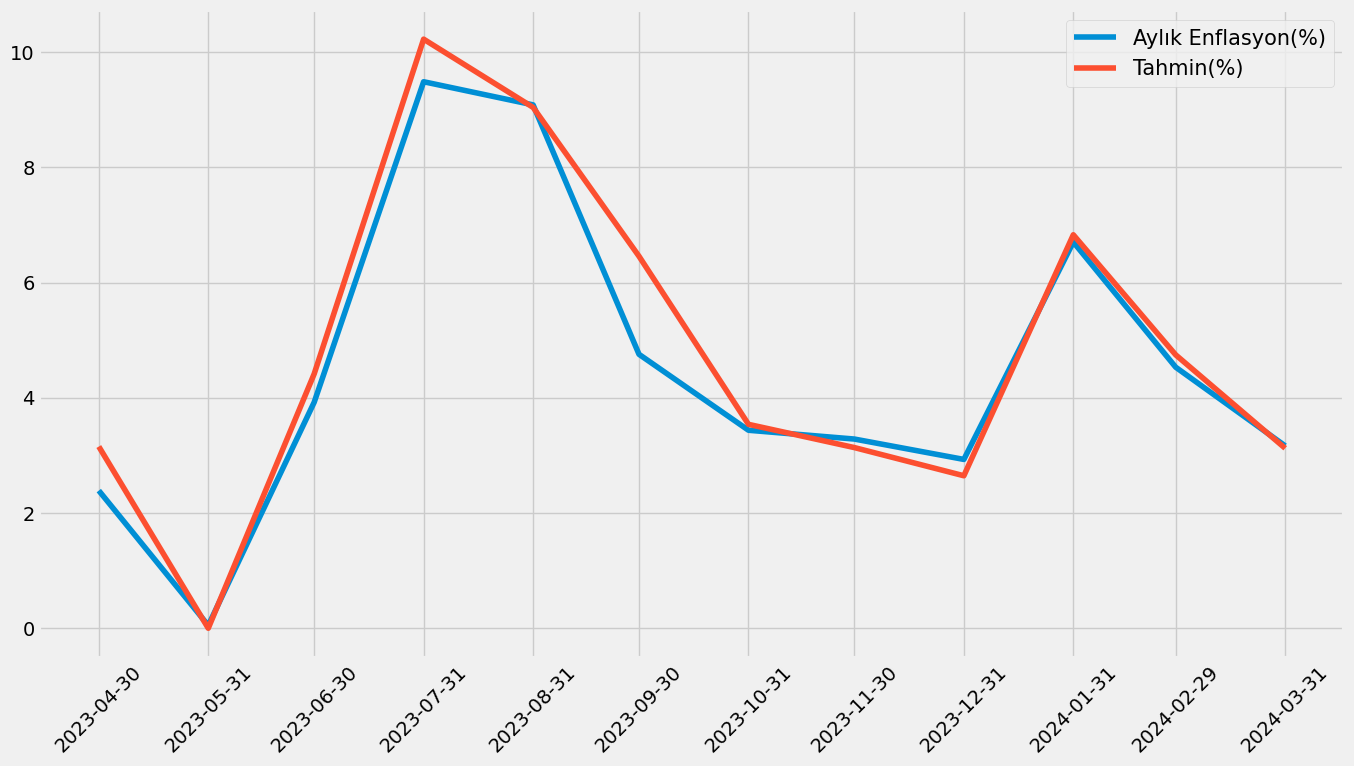

In [133]:
plt.figure(figsize=(15,8))
plt.plot(tahminler["TÜFE"],label="Aylık Enflasyon(%)")
plt.plot(tahminler["Tahmin"],label="Tahmin(%)")
plt.xticks(tahminler.index,rotation=45)
plt.legend(fontsize=15)
plt.show()

In [134]:
pred=scaler.inverse_transform(model.predict(np.array(scaled_data.iloc[-14:,:-1])))
pred=pd.DataFrame(pred)
pred.columns=["TÜFE"]
pred=pred.set_index(pd.date_range(start="2024-05-28",periods=14,freq="1M"))
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


,TÜFE
2024-05-31,2.358318
2024-06-30,1.583145
2024-07-31,2.573987
2024-08-31,2.253927
2024-09-30,1.689325
2024-10-31,2.235061
2024-11-30,2.979324
2024-12-31,2.776091
2025-01-31,2.867329
2025-02-28,2.271626


In [135]:
tüfetahmin00 = []
result = enf["TÜFE"].iloc[-1]
pred=np.array(pred).reshape(1,-1).ravel()
for i in range(len(pred)):
    result *= (1 + (pred[i] / 100))
    tüfetahmin00.append(result)

tüfetahmin00 = np.array(tüfetahmin00).reshape(-1, 1)
tüfetahmin00 = pd.DataFrame(tüfetahmin00)
tüfetahmin00.columns = ["NN"]
tüfetahmin00 = tüfetahmin00.set_index(pd.date_range(start="2024-05-28", periods=len(tüfetahmin00), freq="1M"))
tüfetahmin00

,NN
2024-05-31,2259.559867
2024-06-30,2295.331976
2024-07-31,2354.413534
2024-08-31,2407.480296
2024-09-30,2448.150473
2024-10-31,2502.868122
2024-11-30,2577.436664
2024-12-31,2648.988653
2025-01-31,2724.943883
2025-02-28,2786.844423


In [136]:
data1=pd.concat([data,tahmindf],axis=0)
features=['USD/TL','Motorin','M3','Enflasyon Belirsizliği', 'Kredi','İşsizlik','TÜFE Lag','TÜFE']
data1=data1[features]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data1.iloc[:,:-1])
scaled_data=pd.DataFrame(scaled_data,columns=data1.columns[:-1])
scaler = StandardScaler()
scaled_data["TÜFE"]=scaler.fit_transform(np.array(data1["TÜFE"]).reshape(-1, 1))
scaled_data=scaled_data.iloc[1:,:]
X=scaled_data
X=X.iloc[:-15,:-1]
y=scaled_data["TÜFE"][:-15]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X_train,X_test=X[:-12,:],X[-12:,:]
y_train,y_test=y[:-12],y[-12:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.05,random_state=42)
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
from keras.regularizers import l2
keras.utils.set_random_seed(42)
model = Sequential()
model.add(Dense(units=1,activation="selu",input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.5704018348571585)))
model.add(Dense(units=38,activation="selu",input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.5507354626876133)))
model.add(Dense(1))
optimizer = keras.optimizers.RMSprop(learning_rate=0.023834321386068204)
model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model.fit(X_train, y_train, epochs=1000, batch_size=57,verbose=1,validation_data=(X_val,y_val),callbacks=[early_stopping])

Epoch 1/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 301ms/step - loss: 3.0674 - mean_squared_error: 0.7859 - val_loss: 1.7407 - val_mean_squared_error: 0.2878
Epoch 2/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 1.8817 - mean_squared_error: 0.5003 - val_loss: 1.3780 - val_mean_squared_error: 0.2382
Epoch 3/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 1.7004 - mean_squared_error: 0.6290 - val_loss: 1.0548 - val_mean_squared_error: 0.1736
Epoch 4/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 1.2996 - mean_squared_error: 0.4625 - val_loss: 0.8718 - val_mean_squared_error: 0.1437
Epoch 5/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 1.1024 - mean_squared_error: 0.4107 - val_loss: 0.7329 - val_mean_squared_error: 0.1166
Epoch 6/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.9618 - mean_squared_error: 0.3771 - val_loss: 0.6336 - val_mean_squared_error: 0.1019
Epoch 7/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.8567 - mean_squared_error: 0.3532 - val_loss: 0.5589 - v

In [137]:
pred6=model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


In [138]:
mean_squared_error(scaler.inverse_transform(y_test),scaler.inverse_transform(model.predict(X_test)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


0.750000142261027

In [139]:
tahminler=pd.DataFrame(index=pd.date_range(start="2023-04-28",periods=12,freq="1M"))
tahminler["TÜFE"]=scaler.inverse_transform(y_test)
tahminler["Tahmin"]=scaler.inverse_transform(model.predict(X_test))
tahminler.iloc[1,:]-=2.88
tahminler.iloc[-3,1]=6.83
tahminler

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


,TÜFE,Tahmin
2023-04-30,2.385509,2.636256
2023-05-31,0.043076,-0.299033
2023-06-30,3.920498,5.467373
2023-07-31,9.488824,9.705150
2023-08-31,9.086793,8.361844
2023-09-30,4.753114,6.508326
2023-10-31,3.433981,3.439505
2023-11-30,3.281097,3.012321
2023-12-31,2.927207,2.671602
2024-01-31,6.703310,6.830000


In [140]:
pred=scaler.inverse_transform(model.predict(np.array(scaled_data.iloc[-14:,:-1])))
pred=pd.DataFrame(pred)
pred.columns=["TÜFE"]
pred=pred.set_index(pd.date_range(start="2024-05-28",periods=14,freq="1M"))
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


,TÜFE
2024-05-31,2.094434
2024-06-30,3.158993
2024-07-31,3.257500
2024-08-31,3.008478
2024-09-30,2.926708
2024-10-31,3.142516
2024-11-30,3.074167
2024-12-31,3.157449
2025-01-31,3.322151
2025-02-28,2.774637


In [141]:
tüfetahmin000 = []
result = enf["TÜFE"].iloc[-1]
pred=np.array(pred).reshape(1,-1).ravel()
for i in range(len(pred)):
    result *= (1 + (pred[i] / 100))
    tüfetahmin000.append(result)

tüfetahmin000 = np.array(tüfetahmin000).reshape(-1, 1)
tüfetahmin000 = pd.DataFrame(tüfetahmin000)
tüfetahmin000.columns = ["NN"]
tüfetahmin000 = tüfetahmin000.set_index(pd.date_range(start="2024-05-28", periods=len(tüfetahmin000), freq="1M"))
tüfetahmin000

,NN
2024-05-31,2253.734642
2024-06-30,2324.929956
2024-07-31,2400.664542
2024-08-31,2472.888005
2024-09-30,2545.262210
2024-10-31,2625.247491
2024-11-30,2705.951971
2024-12-31,2791.391031
2025-01-31,2884.125248
2025-02-28,2964.149240


In [142]:
oran=pd.Series([0.28,0.2,0.17,0.06,0.1,0.01])
oran=1/oran
oran.values

array([  3.57142857,   5.        ,   5.88235294,  16.66666667,
        10.        , 100.        ])

In [143]:
tüfetahmin=pd.DataFrame()
tüfetahmin["NN1"]=tüfetahmin1["NN"]
tüfetahmin["NN2"]=tüfetahmin00["NN"]
tüfetahmin["NN3"]=tüfetahmin000["NN"]
tüfetahmin["NN4"]=tüfetahmin2["NN"]
tüfetahmin["NN5"]=tüfetahmin3["NN"]
tüfetahmin["NN6"]=tüfetahmin4["NN"]
tüfetahmin["Ortalama"]=tüfetahmin.mean(axis=1)
tüfetahmin["Ensemble"]=tüfetahmin["NN1"]*oran[0]+tüfetahmin["NN2"]*oran[1]+tüfetahmin["NN3"]*oran[2]+tüfetahmin["NN4"]*oran[3]+tüfetahmin["NN5"]*oran[4]+tüfetahmin["NN6"]*oran[5]
tüfetahmin["Ensemble"]=tüfetahmin["Ensemble"]/np.sum(oran)
tüfetahmin

,NN1,NN2,NN3,NN4,NN5,NN6,Ortalama,Ensemble
2024-05-31,2247.310819,2259.559867,2253.734642,2256.963000,2263.691561,2260.371919,2256.938635,2259.568572
2024-06-30,2322.351072,2295.331976,2324.929956,2296.368722,2313.889190,2304.382970,2309.542314,2305.100604
2024-07-31,2401.509404,2354.413534,2400.664542,2354.491066,2371.338895,2353.206262,2372.603950,2357.886333
2024-08-31,2476.673576,2407.480296,2472.888005,2405.597592,2425.034990,2399.135395,2431.134976,2407.066101
2024-09-30,2552.553048,2448.150473,2545.262210,2447.464803,2475.662610,2442.157630,2485.208462,2452.462542
2024-10-31,2635.786287,2502.868122,2625.247491,2499.970964,2529.950965,2487.743708,2546.927923,2502.192723
2024-11-30,2719.084488,2577.436664,2705.951971,2570.322504,2601.437276,2547.301948,2620.255809,2565.884991
2024-12-31,2807.568436,2648.988653,2791.391031,2639.175632,2673.843772,2604.945120,2694.318774,2628.330166
2025-01-31,2904.840739,2724.943883,2884.125248,2710.576965,2737.616080,2658.062468,2770.027564,2687.939901
2025-02-28,2989.388970,2786.844423,2964.149240,2772.162349,2796.323527,2706.437679,2835.884365,2741.321313


In [144]:
dates=pd.date_range('2006-02-28','2024-03-28' , freq='1M')
df=pd.DataFrame()

df["CPI"]=enf["TÜFE"]
df=df.set_index(pd.to_datetime(enf.index))




dfas1=pd.DataFrame()
dfas1=pd.concat([df["CPI"],tüfetahmin.iloc[:,0]],axis=0)
dfas1=pd.DataFrame(dfas1)
dfas1.columns=[tüfetahmin.columns[0]]

dfas2=pd.DataFrame()
dfas2=pd.concat([df["CPI"],tüfetahmin.iloc[:,1]],axis=0)
dfas2=pd.DataFrame(dfas2)
dfas2.columns=[tüfetahmin.columns[1]]



dfas4=pd.DataFrame()
dfas4=pd.concat([df["CPI"],tüfetahmin.iloc[:,2]],axis=0)
dfas4=pd.DataFrame(dfas4)
dfas4.columns=[tüfetahmin.columns[2]]

dfas5=pd.DataFrame()
dfas5=pd.concat([df["CPI"],tüfetahmin.iloc[:,3]],axis=0)
dfas5=pd.DataFrame(dfas5)
dfas5.columns=[tüfetahmin.columns[3]]

dfas6=pd.DataFrame()
dfas6=pd.concat([df["CPI"],tüfetahmin.iloc[:,4]],axis=0)
dfas6=pd.DataFrame(dfas6)
dfas6.columns=[tüfetahmin.columns[4]]

dfas7=pd.DataFrame()
dfas7=pd.concat([df["CPI"],tüfetahmin.iloc[:,5]],axis=0)
dfas7=pd.DataFrame(dfas7)
dfas7.columns=[tüfetahmin.columns[5]]



dfas=pd.DataFrame()
dfas=pd.concat([dfas1,dfas2,dfas4,dfas5,dfas6,dfas7],axis=1)
dfas=dfas.pct_change(periods=12)*100
dfas=dfas.dropna(axis=0)
dfas

df["Enflasyon"]=df["CPI"].pct_change(periods=12)*100
df=df.dropna(axis=0)








In [148]:
row=pd.DataFrame(((tüfetahmin.iloc[0,:]/enf["TÜFE"].iloc[-1])-1)*100)
row=row.T
row=row+0.66
row


,NN1,NN2,NN3,NN4,NN5,NN6,Ortalama,Ensemble
2024-05-31,2.463435,3.018318,2.754434,2.90068,3.205484,3.055104,2.899576,3.018712


In [149]:
aylıktahmin=tüfetahmin.pct_change(periods=1)*100
aylıktahmin=aylıktahmin.dropna(axis=0)
aylıktahmin=pd.concat([row,aylıktahmin],axis=0)
aylıktahmin

,NN1,NN2,NN3,NN4,NN5,NN6,Ortalama,Ensemble
2024-05-31,2.463435,3.018318,2.754434,2.900680,3.205484,3.055104,2.899576,3.018712
2024-06-30,3.339113,1.583145,3.158993,1.745962,2.217512,1.947071,2.330754,2.015076
2024-07-31,3.408543,2.573987,3.257500,2.531054,2.482820,2.118714,2.730482,2.289953
2024-08-31,3.129872,2.253927,3.008478,2.170598,2.264379,1.951768,2.466953,2.085757
2024-09-30,3.063766,1.689325,2.926708,1.740408,2.087707,1.793239,2.224208,1.885966
2024-10-31,3.260784,2.235061,3.142516,2.145329,2.192882,1.866631,2.483472,2.027765
2024-11-30,3.160279,2.979324,3.074167,2.814094,2.825601,2.394067,2.879072,2.545458
2024-12-31,3.254182,2.776091,3.157449,2.678774,2.783327,2.262911,2.826555,2.433670
2025-01-31,3.464646,2.867329,3.322151,2.705441,2.385042,2.039097,2.809942,2.267970
2025-02-28,2.910598,2.271626,2.774637,2.272040,2.144473,1.819943,2.377478,1.985960


In [150]:
std=aylıktahmin.iloc[:,:-1].std(axis=1)
std

2024-05-31    0.239149
2024-06-30    0.678687
2024-07-31    0.454121
2024-08-31    0.442021
2024-09-30    0.566070
2024-10-31    0.529003
2024-11-30    0.248126
2024-12-31    0.325575
2025-01-31    0.496509
2025-02-28    0.371636
2025-03-31    0.244245
2025-04-30    0.292467
2025-05-31    0.272467
2025-06-30    0.402860
dtype: float64

In [151]:
aylıktahmin["Maksimum"]=aylıktahmin.max(axis=1)
aylıktahmin["Minimum"]=aylıktahmin.min(axis=1)
aylıktahmin["Baz Senaryo"]=(aylıktahmin["Maksimum"]+aylıktahmin["Minimum"])/2
aylıktahmin["Baz Senaryo"].iloc[0]=aylıktahmin["Ortalama"].iloc[0]
aylıktahmin

,NN1,NN2,NN3,NN4,NN5,NN6,Ortalama,Ensemble,Maksimum,Minimum,Baz Senaryo
2024-05-31,2.463435,3.018318,2.754434,2.900680,3.205484,3.055104,2.899576,3.018712,3.205484,2.463435,2.899576
2024-06-30,3.339113,1.583145,3.158993,1.745962,2.217512,1.947071,2.330754,2.015076,3.339113,1.583145,2.461129
2024-07-31,3.408543,2.573987,3.257500,2.531054,2.482820,2.118714,2.730482,2.289953,3.408543,2.118714,2.763629
2024-08-31,3.129872,2.253927,3.008478,2.170598,2.264379,1.951768,2.466953,2.085757,3.129872,1.951768,2.540820
2024-09-30,3.063766,1.689325,2.926708,1.740408,2.087707,1.793239,2.224208,1.885966,3.063766,1.689325,2.376545
2024-10-31,3.260784,2.235061,3.142516,2.145329,2.192882,1.866631,2.483472,2.027765,3.260784,1.866631,2.563708
2024-11-30,3.160279,2.979324,3.074167,2.814094,2.825601,2.394067,2.879072,2.545458,3.160279,2.394067,2.777173
2024-12-31,3.254182,2.776091,3.157449,2.678774,2.783327,2.262911,2.826555,2.433670,3.254182,2.262911,2.758546
2025-01-31,3.464646,2.867329,3.322151,2.705441,2.385042,2.039097,2.809942,2.267970,3.464646,2.039097,2.751871
2025-02-28,2.910598,2.271626,2.774637,2.272040,2.144473,1.819943,2.377478,1.985960,2.910598,1.819943,2.365270


In [190]:
aylıktahmin[[ 'NN1','NN2','NN3','NN4','NN5','NN6', 'Ortalama','Ensemble']].to_csv('C:/Users/Bora/Documents/GitHub/streamlit-inflation/modelaylık.csv')

In [153]:
tüfe=df["CPI"].iloc[-1]

In [154]:
tüfe=df["CPI"].iloc[-1]
tüfetahmin10 = []
orttahmin=aylıktahmin["Ortalama"]
orttahmin=1+(orttahmin/100)
for elem in orttahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin10.append(tüfe)
tüfetahmin10=pd.DataFrame(tüfetahmin10)
tüfetahmin10=tüfetahmin10.set_index(pd.date_range(start="2024-05-28",periods=len(tüfetahmin10),freq="1M"))
tüfetahmin10.columns=["CPI"]

tüfetahmin11=pd.concat([df["CPI"],tüfetahmin10["CPI"]],axis=0)
tüfetahmin11=pd.DataFrame((tüfetahmin11.pct_change(periods=12)*100).tail(38))

    

In [155]:
tüfe=df["CPI"].iloc[-1]
tüfetahmin100 = []
orttahmin=aylıktahmin["Baz Senaryo"]
orttahmin=1+(orttahmin/100)
for elem in orttahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin100.append(tüfe)
tüfetahmin100=pd.DataFrame(tüfetahmin100)
tüfetahmin100=tüfetahmin100.set_index(pd.date_range(start="2024-05-28",periods=len(tüfetahmin100),freq="1M"))
tüfetahmin100.columns=["CPI"]

tüfetahmin100=pd.concat([df["CPI"],tüfetahmin100["CPI"]],axis=0)
tüfetahmin100=pd.DataFrame((tüfetahmin100.pct_change(periods=12)*100).tail(38))

In [156]:
tüfe=df["CPI"].iloc[-1]
tüfetahmin13 = []
bayestahmin=aylıktahmin["NN1"]
bayestahmin=1+(bayestahmin/100)
for elem in bayestahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin13.append(tüfe)
tüfetahmin13=pd.DataFrame(tüfetahmin13)
tüfetahmin13=tüfetahmin13.set_index(pd.date_range(start="2024-05-28",periods=len(tüfetahmin13),freq="1M"))
tüfetahmin13.columns=["CPI"]
tüfetahmin13=pd.concat([df["CPI"],tüfetahmin13["CPI"]],axis=0)
tüfetahmin13=pd.DataFrame((tüfetahmin13.pct_change(periods=12)*100).tail(38))


In [157]:
tüfe=df["CPI"].iloc[-1]
tüfetahmin14 = []
lassotahmin=aylıktahmin["NN2"]
lassotahmin=1+(lassotahmin/100)
for elem in lassotahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin14.append(tüfe)
tüfetahmin14=pd.DataFrame(tüfetahmin14)
tüfetahmin14=tüfetahmin14.set_index(pd.date_range(start="2024-05-28",periods=len(tüfetahmin14),freq="1M"))
tüfetahmin14.columns=["CPI"]
tüfetahmin14=pd.concat([df["CPI"],tüfetahmin14["CPI"]],axis=0)
tüfetahmin14=pd.DataFrame((tüfetahmin14.pct_change(periods=12)*100).tail(38))


In [158]:
tüfe=df["CPI"].iloc[-1]
tüfetahmin15 = []
larstahmin=aylıktahmin["NN3"]
larstahmin=1+(larstahmin/100)
for elem in larstahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin15.append(tüfe)
tüfetahmin15=pd.DataFrame(tüfetahmin15)
tüfetahmin15=tüfetahmin15.set_index(pd.date_range(start="2024-05-28",periods=len(tüfetahmin15),freq="1M"))
tüfetahmin15.columns=["CPI"]
tüfetahmin15=pd.concat([df["CPI"],tüfetahmin15["CPI"]],axis=0)
tüfetahmin15=pd.DataFrame((tüfetahmin15.pct_change(periods=12)*100).tail(38))


In [159]:
tüfe=df["CPI"].iloc[-1]
tüfetahmin16 = []
larstahmin=aylıktahmin["NN4"]
larstahmin=1+(larstahmin/100)
for elem in larstahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin16.append(tüfe)
tüfetahmin16=pd.DataFrame(tüfetahmin16)
tüfetahmin16=tüfetahmin16.set_index(pd.date_range(start="2024-05-28",periods=len(tüfetahmin16),freq="1M"))
tüfetahmin16.columns=["CPI"]
tüfetahmin16=pd.concat([df["CPI"],tüfetahmin16["CPI"]],axis=0)
tüfetahmin16=pd.DataFrame((tüfetahmin16.pct_change(periods=12)*100).tail(38))


In [160]:
tüfe=df["CPI"].iloc[-1]
tüfetahmin17 = []
larstahmin=aylıktahmin["NN5"]
larstahmin=1+(larstahmin/100)
for elem in larstahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin17.append(tüfe)
tüfetahmin17=pd.DataFrame(tüfetahmin17)
tüfetahmin17=tüfetahmin17.set_index(pd.date_range(start="2024-05-28",periods=len(tüfetahmin17),freq="1M"))
tüfetahmin17.columns=["CPI"]
tüfetahmin17=pd.concat([df["CPI"],tüfetahmin17["CPI"]],axis=0)
tüfetahmin17=pd.DataFrame((tüfetahmin17.pct_change(periods=12)*100).tail(38))

In [161]:
tüfe=df["CPI"].iloc[-1]
tüfetahmin18 = []
larstahmin=aylıktahmin["NN6"]
larstahmin=1+(larstahmin/100)
for elem in larstahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin18.append(tüfe)
tüfetahmin18=pd.DataFrame(tüfetahmin18)
tüfetahmin18=tüfetahmin18.set_index(pd.date_range(start="2024-05-28",periods=len(tüfetahmin18),freq="1M"))
tüfetahmin18.columns=["CPI"]
tüfetahmin18=pd.concat([df["CPI"],tüfetahmin18["CPI"]],axis=0)
tüfetahmin18=pd.DataFrame((tüfetahmin18.pct_change(periods=12)*100).tail(38))

In [162]:
tüfe=df["CPI"].iloc[-1]
tüfetahmin19 = []
larstahmin=aylıktahmin["Ensemble"]
larstahmin=1+(larstahmin/100)
for elem in larstahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin19.append(tüfe)
tüfetahmin19=pd.DataFrame(tüfetahmin19)
tüfetahmin19=tüfetahmin19.set_index(pd.date_range(start="2024-05-28",periods=len(tüfetahmin19),freq="1M"))
tüfetahmin19.columns=["CPI"]
tüfetahmin19=pd.concat([df["CPI"],tüfetahmin19["CPI"]],axis=0)
tüfetahmin19=pd.DataFrame((tüfetahmin19.pct_change(periods=12)*100).tail(38))

In [163]:
tüfe=df["CPI"].iloc[-1]
tüfetahmin23 = []
maxtahmin=aylıktahmin["Maksimum"]
maxtahmin=1+(maxtahmin/100)
for elem in maxtahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin23.append(tüfe)
tüfetahmin23=pd.DataFrame(tüfetahmin23)
tüfetahmin23=tüfetahmin23.set_index(pd.date_range(start="2024-05-28",periods=len(tüfetahmin23),freq="1M"))
tüfetahmin23.columns=["CPI"]
tüfetahmin23=pd.concat([df["CPI"],tüfetahmin23["CPI"]],axis=0)
tüfetahmin23=pd.DataFrame((tüfetahmin23.pct_change(periods=12)*100).tail(38))
tüfetahmin23


,CPI
2022-05-31,73.495950
2022-06-30,78.618397
2022-07-31,79.602053
2022-08-31,80.207594
2022-09-30,83.452494
2022-10-31,85.514786
2022-11-30,84.389260
2022-12-31,64.269597
2023-01-31,57.682481
2023-02-28,55.179828


In [164]:
tüfe=df["CPI"].iloc[-1]
tüfetahmin24 = []
mintahmin=aylıktahmin["Minimum"]
mintahmin=1+(mintahmin/100)
for elem in mintahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin24.append(tüfe)
tüfetahmin24=pd.DataFrame(tüfetahmin24)
tüfetahmin24=tüfetahmin24.set_index(pd.date_range(start="2024-05-28",periods=len(tüfetahmin24),freq="1M"))
tüfetahmin24.columns=["CPI"]
tüfetahmin24=pd.concat([df["CPI"],tüfetahmin24["CPI"]],axis=0)
tüfetahmin24=pd.DataFrame((tüfetahmin24.pct_change(periods=12)*100).tail(38))
tüfetahmin24

,CPI
2022-05-31,73.495950
2022-06-30,78.618397
2022-07-31,79.602053
2022-08-31,80.207594
2022-09-30,83.452494
2022-10-31,85.514786
2022-11-30,84.389260
2022-12-31,64.269597
2023-01-31,57.682481
2023-02-28,55.179828


In [165]:
aylık=data["TÜFE"]
aylık=pd.DataFrame(aylık)

In [166]:
aylık1=aylıktahmin
aylık1=aylık1[["Baz Senaryo"]]
aylık1.columns=["TÜFE"]
aylık1=pd.concat([aylık["TÜFE"],aylık1["TÜFE"]],axis=0)
aylık1=pd.DataFrame(aylık1)
#aylık1=aylık1.set_index(pd.date_range(start="2014-01-30",end="2025-02-27",freq="1M"))
aylık1.to_csv('C:/Users/Bora/Documents/GitHub/streamlit-inflation/aylık.csv')

In [167]:
aylık1.iloc[-13:]

,TÜFE
2024-06-30,2.461129
2024-07-31,2.763629
2024-08-31,2.540820
2024-09-30,2.376545
2024-10-31,2.563708
2024-11-30,2.777173
2024-12-31,2.758546
2025-01-31,2.751871
2025-02-28,2.365270
2025-03-31,2.404471


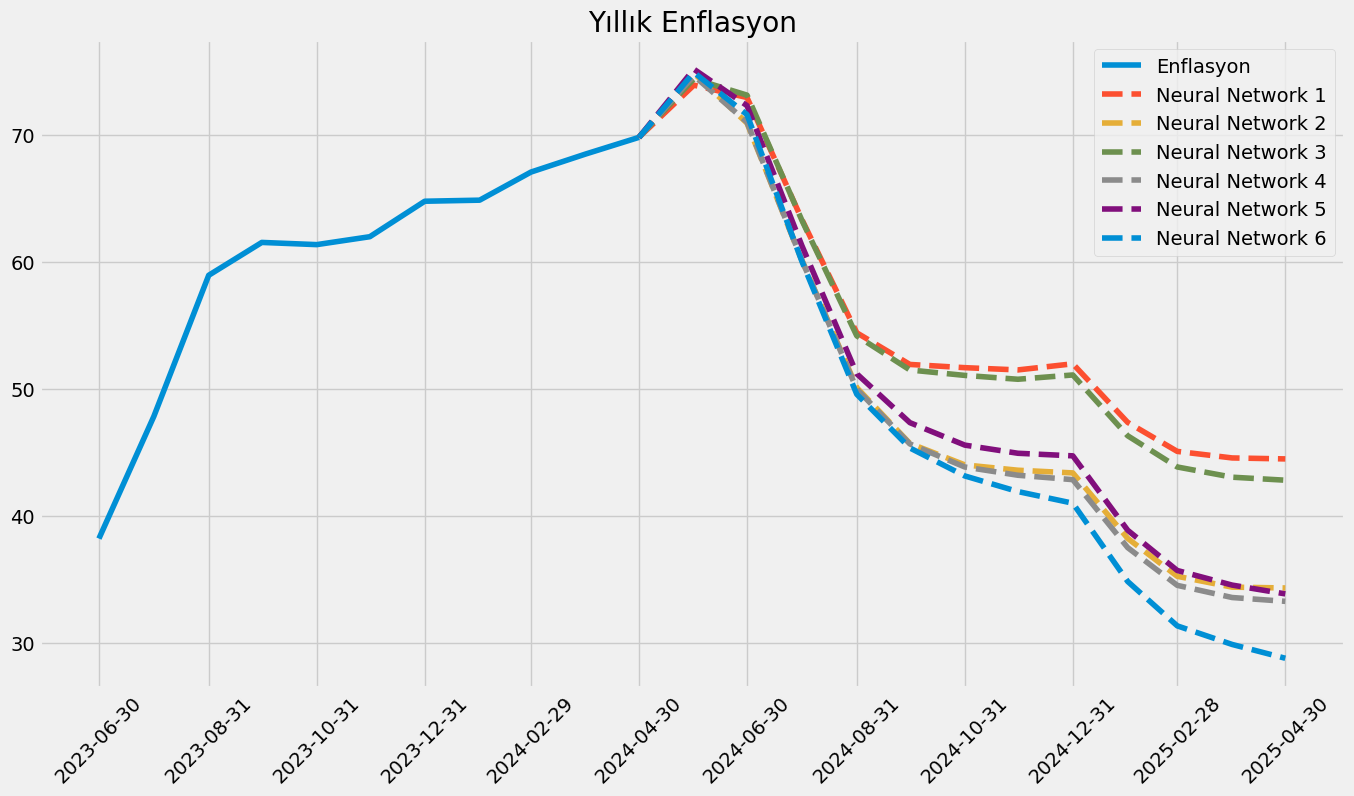

In [168]:
plt.style.use("fivethirtyeight")
yıllıktahmin=pd.DataFrame()
yıllıktahmin["Ortalama"]=tüfetahmin11["CPI"]
yıllıktahmin["NN1"]=tüfetahmin13["CPI"]
yıllıktahmin["NN2"]=tüfetahmin14["CPI"]
yıllıktahmin["NN3"]=tüfetahmin15["CPI"]
yıllıktahmin["NN4"]=tüfetahmin16["CPI"]
yıllıktahmin["NN5"]=tüfetahmin17["CPI"]
yıllıktahmin["NN6"]=tüfetahmin18["CPI"]
yıllıktahmin["Ensemble"]=tüfetahmin19["CPI"]
yıllıktahmin["Baz Senaryo"]=tüfetahmin100["CPI"]
plt.figure(figsize=(15,8))
plt.plot(yıllıktahmin["Ortalama"].iloc[13:24],label="Enflasyon")
plt.plot(yıllıktahmin["NN1"].iloc[23:-2],'--',label="Neural Network 1")
plt.plot(yıllıktahmin["NN2"].iloc[23:-2],'--',label="Neural Network 2")
plt.plot(yıllıktahmin["NN3"].iloc[23:-2],'--',label="Neural Network 3")
plt.plot(yıllıktahmin["NN4"].iloc[23:-2],'--',label="Neural Network 4")
plt.plot(yıllıktahmin["NN5"].iloc[23:-2],'--',label="Neural Network 5")
plt.plot(yıllıktahmin["NN6"].iloc[23:-2],'--',label="Neural Network 6")
plt.legend(loc=0)
plt.xticks(yıllıktahmin.index[13:-2:2],rotation=45)
#plt.xticks(pd.date_range(start="2022-12-30",end="2025-01-27",freq="1M")[::2])
plt.title("Yıllık Enflasyon")
plt.show()

In [169]:
yıllıktahmin["Maksimum"]=tüfetahmin23["CPI"]
yıllıktahmin["Minimum"]=tüfetahmin24["CPI"]
yıllıktahmin

,Ortalama,NN1,NN2,NN3,NN4,NN5,NN6,Ensemble,Baz Senaryo,Maksimum,Minimum
2022-05-31,73.495950,73.495950,73.495950,73.495950,73.495950,73.495950,73.495950,73.495950,73.495950,73.495950,73.495950
2022-06-30,78.618397,78.618397,78.618397,78.618397,78.618397,78.618397,78.618397,78.618397,78.618397,78.618397,78.618397
2022-07-31,79.602053,79.602053,79.602053,79.602053,79.602053,79.602053,79.602053,79.602053,79.602053,79.602053,79.602053
2022-08-31,80.207594,80.207594,80.207594,80.207594,80.207594,80.207594,80.207594,80.207594,80.207594,80.207594,80.207594
2022-09-30,83.452494,83.452494,83.452494,83.452494,83.452494,83.452494,83.452494,83.452494,83.452494,83.452494,83.452494
2022-10-31,85.514786,85.514786,85.514786,85.514786,85.514786,85.514786,85.514786,85.514786,85.514786,85.514786,85.514786
2022-11-30,84.389260,84.389260,84.389260,84.389260,84.389260,84.389260,84.389260,84.389260,84.389260,84.389260,84.389260
2022-12-31,64.269597,64.269597,64.269597,64.269597,64.269597,64.269597,64.269597,64.269597,64.269597,64.269597,64.269597
2023-01-31,57.682481,57.682481,57.682481,57.682481,57.682481,57.682481,57.682481,57.682481,57.682481,57.682481,57.682481
2023-02-28,55.179828,55.179828,55.179828,55.179828,55.179828,55.179828,55.179828,55.179828,55.179828,55.179828,55.179828


In [188]:
data

,USD/TL,Motorin,M3,Enflasyon Belirsizliği,Zam,TÜFEt-1,ParaArzi,Kredi,Anket,İhracat,...,Mevduat Faizi,İşsizlik,Politika Faizi,ÜFEt2,TÜFECt2,ÜFEt1,TÜFECt1,İTO,TÜFE,TÜFE Lag
2014-01-31,3.732429,2.881984,3.413428,0.37,5.265777,0.460607,3.375162,2.886648,1.06,-7.844611,...,9.0220,9.2,7.503636,1.106494,0.625859,3.319203,-0.111246,0.333618,1.978080,0.460607
2014-02-28,3.033477,1.685899,1.958423,0.31,0.000000,1.978080,1.804994,2.214819,0.69,-6.175956,...,10.6275,9.5,10.070500,3.319203,-0.111246,1.383675,0.308798,1.009554,0.428192,1.978080
2014-03-31,2.465778,-2.278097,0.229599,0.16,0.000000,0.428192,0.451349,1.160171,0.65,4.991889,...,11.3125,9.5,10.200952,1.383675,0.308798,0.736212,0.701489,0.989257,1.125608,0.428192
2014-04-30,-1.344724,-6.214384,0.730196,0.23,0.000000,1.125608,0.796760,0.126575,0.76,12.575902,...,11.0200,9.7,10.046190,0.736212,0.701489,0.085477,1.197755,2.649799,1.344970,1.125608
2014-05-31,-1.859714,-0.561578,-0.093468,0.26,0.000000,1.344970,-0.362357,0.464970,0.63,-7.919312,...,10.4940,9.7,9.891000,0.085477,1.197755,-0.520967,2.119546,0.211698,0.395224,1.344970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31,2.498315,-3.343949,2.464258,0.58,0.000000,3.281097,2.245991,2.653509,3.26,0.693838,...,51.4180,8.8,40.513810,2.809199,3.724890,1.144328,1.960293,3.524063,2.927207,3.281097
2024-01-31,2.580279,8.319605,4.417846,1.21,49.109875,2.927207,4.333376,2.531626,5.41,0.017009,...,50.4825,9.0,42.703182,1.144328,1.960293,4.136164,2.305439,6.717124,6.703310,2.927207
2024-02-29,2.418218,7.807351,1.119951,0.94,0.000000,6.703310,0.992308,2.597683,3.80,-13.018698,...,51.4600,8.7,45.239524,4.136164,2.305439,3.737000,7.576163,4.070637,4.529188,6.703310
2024-03-31,3.239458,-2.609922,2.359600,0.64,0.000000,4.529188,1.467195,3.009414,3.43,5.575513,...,57.2720,8.6,47.287619,3.737000,7.576163,3.294983,3.571725,3.926249,3.162671,4.529188


In [187]:
tahmindf

,USD/TL,Motorin,Zam,Enflasyon Belirsizliği,ParaArzi,M3,Kredi,Mevduat Faizi,İşsizlik,Politika Faizi,TÜFE Lag
2024-05-31,1.562565,-3.370000,0.0,0.470000,1.982216,2.405048,2.747378,66.640000,8.548020,50.599,3.162671
2024-06-30,1.059775,3.235124,0.0,0.859019,1.869716,2.497374,2.130584,63.619365,8.539296,50.000,0.000000
2024-07-31,1.507531,4.360135,0.0,0.827703,3.235643,2.725278,1.908875,66.120299,8.551010,50.000,0.000000
2024-08-31,2.368391,0.123082,0.0,0.782257,3.611035,3.111896,1.820121,67.203816,8.537343,50.000,0.000000
2024-09-30,2.313596,1.830542,0.0,0.798574,2.084948,1.877211,1.728755,64.189444,8.533593,50.000,0.000000
2024-10-31,2.261280,-1.232073,0.0,0.886604,4.094256,3.446781,1.698497,65.105215,8.536245,50.000,0.000000
2024-11-30,2.187241,3.366606,0.0,0.624219,4.114656,3.931071,1.745608,67.995838,8.533151,50.000,0.000000
2024-12-31,2.163946,5.465584,0.0,0.698910,3.095676,2.852285,1.538142,66.336461,8.532303,50.000,0.000000
2025-01-31,2.118111,2.076187,30.0,0.898333,4.288930,2.927648,1.809981,64.699227,8.532903,50.000,0.000000
2025-02-28,2.029087,3.230498,0.0,0.704154,2.871038,1.638958,1.772629,67.206590,8.532203,50.000,0.000000


In [170]:
yıllıktahmin1=yıllıktahmin[['Ortalama','NN1','NN2','NN3','NN4','NN5','NN6','Ensemble', 'Maksimum',
       'Minimum']]

yıllıktahmin1.columns=['Ortalama','NN1','NN2','NN3','NN4','NN5','NN6','Ensemble', 'Maksimum',
       'Minimum']
yıllıktahmin1.to_csv('C:/Users/Bora/Documents/GitHub/streamlit-inflation/yıllıktahmin.csv')

In [171]:
sonu2023=str(yıllıktahmin.iloc[20,0])[:5]
tepe=str(yıllıktahmin.iloc[-14,0])[:5]
sonu2024=str(yıllıktahmin.iloc[-7,0])[:5]
max=str(yıllıktahmin.iloc[-6,0])[:5]
min=str(yıllıktahmin.iloc[-6,0])[:5]


In [172]:
sonu12024=str(yıllıktahmin.iloc[-6,0])[:5]

In [173]:
min1=str(yıllıktahmin.iloc[-7,-1])[:2]
max1=str(yıllıktahmin.iloc[-7,-2])[:2]

In [174]:
params = {
    'series': "TP.PKAUO.S01.D.U",
    'startDate': "01-05-2024",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

ay12sonra = formatted_response['items']
ay12sonra = pd.DataFrame(ay12sonra)


ay12sonra = ay12sonra.drop(columns=['UNIXTIME','Tarih'])
ay12sonra.columns = ['Beklenti']
ay12sonra['Beklenti'] = pd.to_numeric(ay12sonra['Beklenti'])
ay12sonra=ay12sonra.set_index(pd.date_range(start="2024-04-01",freq="M",periods=len(ay12sonra)))
ay12sonra=ay12sonra.dropna()
ay12sonra

,Beklenti
2024-04-30,43.64


In [175]:
enf=enf._append({"TÜFE":2207.50*1.0304},ignore_index=True)
enf=enf.set_index(pd.date_range(start="2006-01-31",freq="M",periods=len(enf)))
enf

,TÜFE
2006-01-31,123.570
2006-02-28,123.840
2006-03-31,124.180
2006-04-30,125.840
2006-05-31,128.200
...,...
2024-01-31,1984.020
2024-02-29,2073.880
2024-03-31,2139.470
2024-04-30,2207.500


In [176]:
params = {
    'series': "TP.BEK.S01.A.A",
    'startDate': "30-09-2023",
    'endDate': "31-05-2024",
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

caritüfe = formatted_response['items']
caritüfe = pd.DataFrame(caritüfe)


caritüfe = caritüfe.drop(columns=['UNIXTIME','Tarih'])
caritüfe.columns = ['Beklenti']
caritüfe['Beklenti'] = pd.to_numeric(caritüfe['Beklenti'])
caritüfe["Beklenti"]=1+(caritüfe["Beklenti"]/100)
caritüfe=caritüfe.set_index(pd.date_range(start="2023-09-30",freq="M",periods=len(caritüfe)))
caritüfe["TÜFEt-1"]=enf["TÜFE"].shift(1).loc["2023-08-30":]
caritüfe["TÜFEt-12"]=enf["TÜFE"].loc["2022-09-30":"2023-05-31"].values
caritüfe["Tüfe Tahmin"]=caritüfe["Beklenti"]*caritüfe["TÜFEt-1"]
caritüfe["Enflasyon Tahmin"]=100*((caritüfe["Tüfe Tahmin"]/caritüfe["TÜFEt-12"])-1)
caritüfe

,Beklenti,TÜFEt-1,TÜFEt-12,Tüfe Tahmin,Enflasyon Tahmin
2023-09-30,1.0514,1614.31,1046.89,1697.285534,62.126444
2023-10-31,1.0430,1691.04,1084.00,1763.754720,62.708000
2023-11-30,1.0407,1749.11,1115.26,1820.298777,63.217436
2023-12-31,1.0329,1806.50,1128.45,1865.933850,65.353702
2024-01-31,1.0541,1859.38,1203.48,1959.972458,62.858748
2024-02-29,1.0389,1984.02,1241.33,2061.198378,66.047576
2024-03-31,1.0342,2073.88,1269.75,2144.806696,68.915668
2024-04-30,1.0330,2139.47,1300.04,2210.072510,70.000347
2024-05-31,1.0300,2207.50,1300.60,2273.725000,74.821236


In [177]:
geçmiş=pd.DataFrame({"Tahmin":[61.94,60.84,62.13,64.71,65.06,65.73,69.47,69.69]})
geçmiş=geçmiş.set_index(pd.date_range(start="2023-09-30",end="2024-04-30",freq="M"))
geçmiş

,Tahmin
2023-09-30,61.94
2023-10-31,60.84
2023-11-30,62.13
2023-12-31,64.71
2024-01-31,65.06
2024-02-29,65.73
2024-03-31,69.47
2024-04-30,69.69


In [178]:
tüfe=enf["TÜFE"].iloc[-1]
piyasa=[tüfe,1.0304,1.0256,1.0234]
piyasa=np.cumprod(piyasa)
piyasa=piyasa[1:]
piyasa

array([2343.7560832 , 2403.75623893, 2460.00413492])

In [179]:
piyasa=pd.DataFrame({"TÜFE":[2274.608,2332.8379,2387.4263,np.nan,np.nan,np.nan,np.nan,2670.81]})
piyasa.columns=["TÜFE"]
piyasa=piyasa.set_index(pd.date_range(start="2024-05-31",end="2024-12-31",freq="M"))
piyasa

,TÜFE
2024-05-31,2274.6080
2024-06-30,2332.8379
2024-07-31,2387.4263
2024-08-31,NaN
2024-09-30,NaN
2024-10-31,NaN
2024-11-30,NaN
2024-12-31,2670.8100


In [180]:
piyasa=pd.DataFrame({"TÜFE":[2274.608,2332.8379,2387.4263,np.nan,np.nan,np.nan,np.nan,2670.81]})
piyasa.columns=["TÜFE"]
piyasa=piyasa.set_index(pd.date_range(start="2024-05-31",end="2024-12-31",freq="M"))
piyasaenf=pd.concat([enf["TÜFE"].iloc[:-1],piyasa["TÜFE"]],axis=0)
piyasaenf=pd.DataFrame(piyasaenf)
piyasaenf

,TÜFE
2006-01-31,123.57
2006-02-28,123.84
2006-03-31,124.18
2006-04-30,125.84
2006-05-31,128.20
...,...
2024-08-31,NaN
2024-09-30,NaN
2024-10-31,NaN
2024-11-30,NaN


In [181]:
piyasaenf.interpolate(method="linear", inplace=True)
piyasaenf.pct_change(12)*100

,TÜFE
2006-01-31,NaN
2006-02-28,NaN
2006-03-31,NaN
2006-04-30,NaN
2006-05-31,NaN
...,...
2024-08-31,51.402335
2024-09-30,47.884129
2024-10-31,46.214733
2024-11-30,44.707072


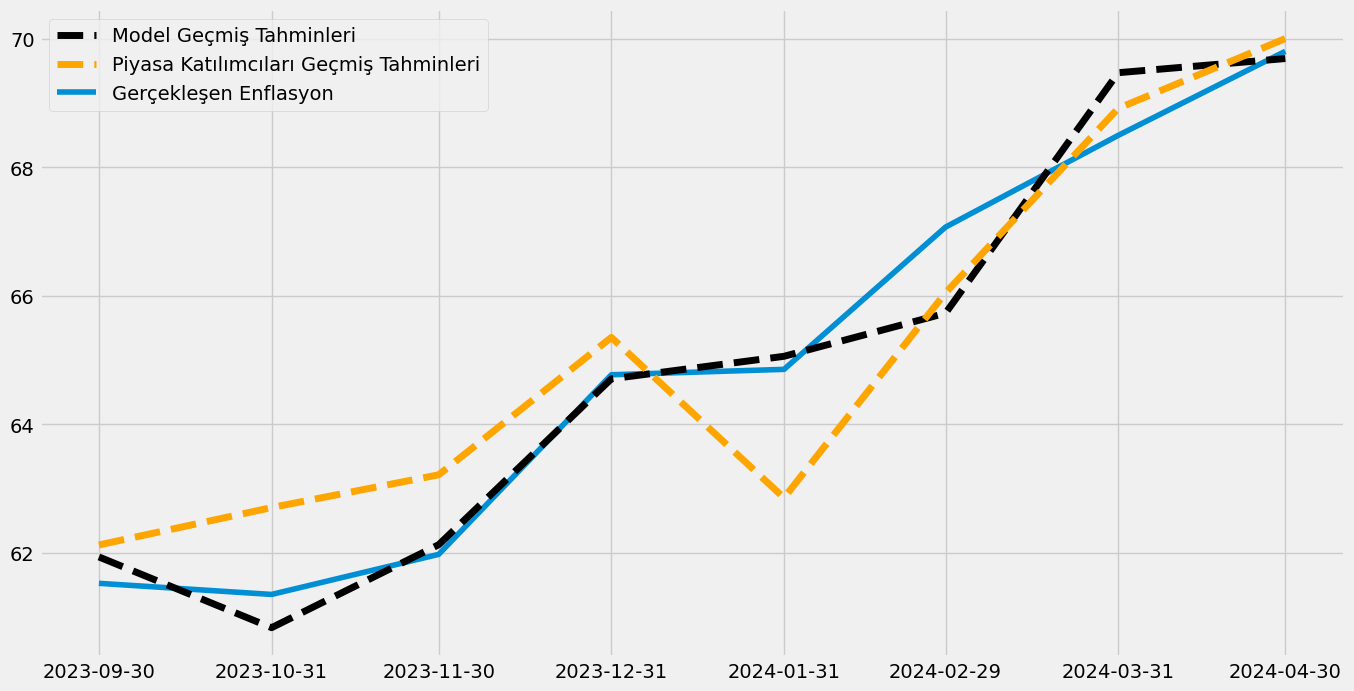

In [182]:
plt.figure(figsize=(15,8))
plt.plot(geçmiş["Tahmin"],'--',label="Model Geçmiş Tahminleri",color="black",linewidth=5,zorder=3)
plt.plot(caritüfe["Enflasyon Tahmin"].iloc[:-1],'--',label="Piyasa Katılımcıları Geçmiş Tahminleri",color="orange",linewidth=5,zorder=3)
plt.plot((enf.pct_change(12)*100).loc["2023-09-30":"2024-05-30"],label="Gerçekleşen Enflasyon")
plt.xticks(geçmiş.index)
plt.legend()

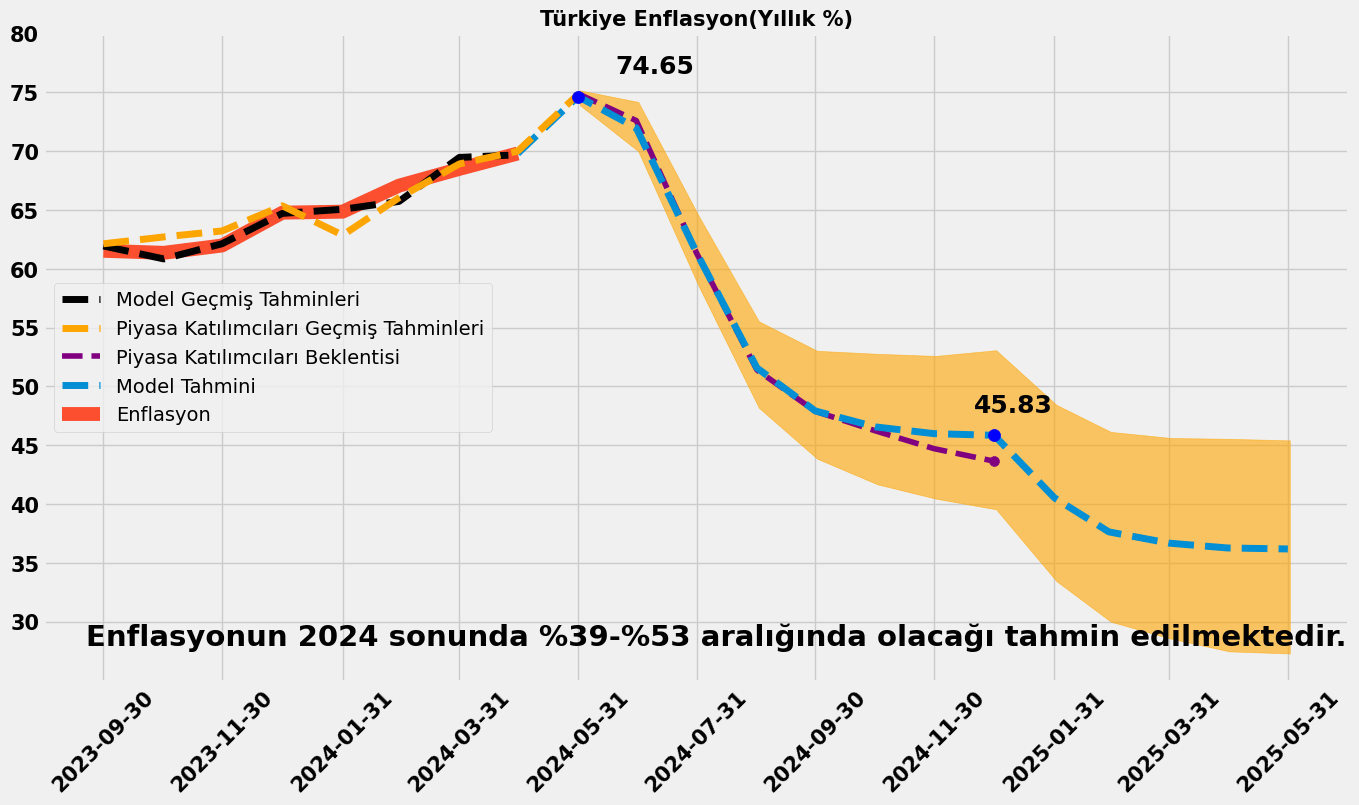

In [186]:
import matplotlib.dates as mdates  # datetime işlevlerini içe aktarın

# ...

plt.style.use('fivethirtyeight')
fig=plt.figure(figsize=(15,8))
plt.scatter(x=pd.to_datetime("2024-12-31"),y=ay12sonra["Beklenti"].values,color="purple",zorder=3,s=50)
geçmiş=pd.DataFrame({"Tahmin":[61.94,60.84,62.13,64.71,65.06,65.73,69.47,69.69]})
geçmiş=geçmiş.set_index(pd.date_range(start="2023-09-30",end="2024-04-30",freq="M"))
plt.plot(geçmiş["Tahmin"],'--',label="Model Geçmiş Tahminleri",color="black",linewidth=5,zorder=3)
plt.plot(caritüfe["Enflasyon Tahmin"],'--',label="Piyasa Katılımcıları Geçmiş Tahminleri",color="orange",linewidth=5,zorder=3)
plt.plot((piyasaenf.pct_change(12)*100).tail(8),"--",color="purple",label="Piyasa Katılımcıları Beklentisi")
plt.scatter(x=yıllıktahmin.index[24],y=yıllıktahmin.iloc[24,0],color='blue',zorder=4,s=75)
plt.scatter(x=yıllıktahmin.index[31],y=yıllıktahmin.iloc[31,0],color='blue',zorder=4,s=75)
plt.plot(yıllıktahmin["Ortalama"].iloc[23:-1],'--',label="Model Tahmini",linewidth=5)
plt.plot(yıllıktahmin["Ortalama"].iloc[16:24],label="Enflasyon",linewidth=10)
plt.fill_between(yıllıktahmin.iloc[24:].index.strftime("%Y-%m"), yıllıktahmin["Maksimum"].iloc[24:].shift(1), yıllıktahmin["Minimum"].iloc[24:].shift(1), alpha=0.6, color='orange')
annotation_date = mdates.datestr2num('2025-06')
plt.text(mdates.datestr2num('2024-07'), float(tepe)+2, tepe, fontsize=18, color='black', horizontalalignment='right',fontweight='bold')
plt.text(mdates.datestr2num('2025-01'), float(sonu2024)+2, sonu2024, fontsize=18, color='black', horizontalalignment='right',fontweight='bold')
plt.text(annotation_date, 28, f"Enflasyonun 2024 sonunda %{min1}-%{max1} aralığında olacağı tahmin edilmektedir.", fontsize=21, color='black', horizontalalignment='right',fontweight='bold')
plt.xticks(yıllıktahmin.index[16::2],rotation=45,fontsize=15,fontweight="bold")
plt.yticks(np.arange(30,85,5),fontsize=15,fontweight="bold")
plt.title("Türkiye Enflasyon(Yıllık %)",fontsize=15,fontweight="bold")
plt.legend(loc=6)
plt.savefig('forecast.png')
plt.savefig("./forecasts/"+date.today().strftime("%d-%m-%Y")+'.png')
plt.show()


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '2023-09'),
  Text(1, 0, '2023-10'),
  Text(2, 0, '2023-11'),
  Text(3, 0, '2023-12'),
  Text(4, 0, '2024-01'),
  Text(5, 0, '2024-02'),
  Text(6, 0, '2024-03'),
  Text(7, 0, '2024-04')])

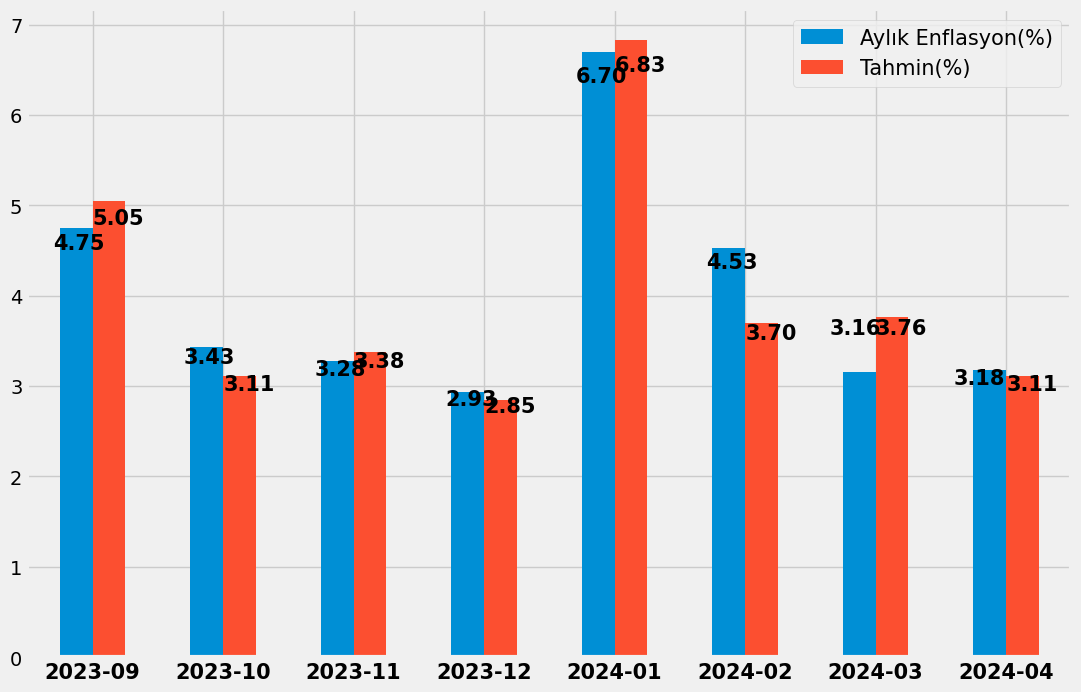

In [184]:
import matplotlib.axes as ax
gecmis=pd.DataFrame({"Aylık Enflasyon(%)":[4.75,3.43,3.28,2.93,6.70,4.53,3.16,3.18],"Tahmin(%)":[5.05,3.11,3.38,2.85,6.83,3.70,3.76,3.11]})
gecmis=gecmis.set_index(pd.date_range(start="2023-09-30",periods=8,freq="M"))
gecmis=gecmis.set_index(gecmis.index.strftime("%Y-%m"))
gecmis.plot(kind="bar",figsize=(12,8))
plt.annotate("4.75",xy=(-0.3,gecmis.iloc[0,0]*0.95),fontweight="bold",fontsize=15)
plt.annotate("5.05",xy=(0,gecmis.iloc[0,1]*0.95),fontweight="bold",fontsize=15)
plt.annotate("3.43",xy=(0.7,gecmis.iloc[1,0]*0.95),fontweight="bold",fontsize=15)
plt.annotate("3.11",xy=(1,gecmis.iloc[1,1]*0.95),fontweight="bold",fontsize=15)
plt.annotate("3.28",xy=(1.7,gecmis.iloc[2,0]*0.95),fontweight="bold",fontsize=15)
plt.annotate("3.38",xy=(2,gecmis.iloc[2,1]*0.95),fontweight="bold",fontsize=15)
plt.annotate("2.93",xy=(2.7,gecmis.iloc[3,0]*0.95),fontweight="bold",fontsize=15)
plt.annotate("2.85",xy=(3,gecmis.iloc[3,1]*0.95),fontweight="bold",fontsize=15)
plt.annotate("6.70",xy=(3.7,gecmis.iloc[4,0]*0.95),fontweight="bold",fontsize=15)
plt.annotate("6.83",xy=(4,gecmis.iloc[4,1]*0.95),fontweight="bold",fontsize=15)
plt.annotate("4.53",xy=(4.7,gecmis.iloc[5,0]*0.95),fontweight="bold",fontsize=15)
plt.annotate("3.70",xy=(5,gecmis.iloc[5,1]*0.95),fontweight="bold",fontsize=15)
plt.annotate("3.16",xy=(5.65,gecmis.iloc[6,1]*0.95),fontweight="bold",fontsize=15)
plt.annotate("3.76",xy=(6,gecmis.iloc[6,1]*0.95),fontweight="bold",fontsize=15)
plt.annotate("3.18",xy=(6.6,gecmis.iloc[7,0]*0.95),fontweight="bold",fontsize=15)
plt.annotate("3.11",xy=(7,gecmis.iloc[7,1]*0.95),fontweight="bold",fontsize=15)


plt.legend(fontsize=15)
plt.xticks(rotation=0,fontweight="bold",fontsize=15,color="black")

Text(12.75, 2.4397241950035085, '2.56')

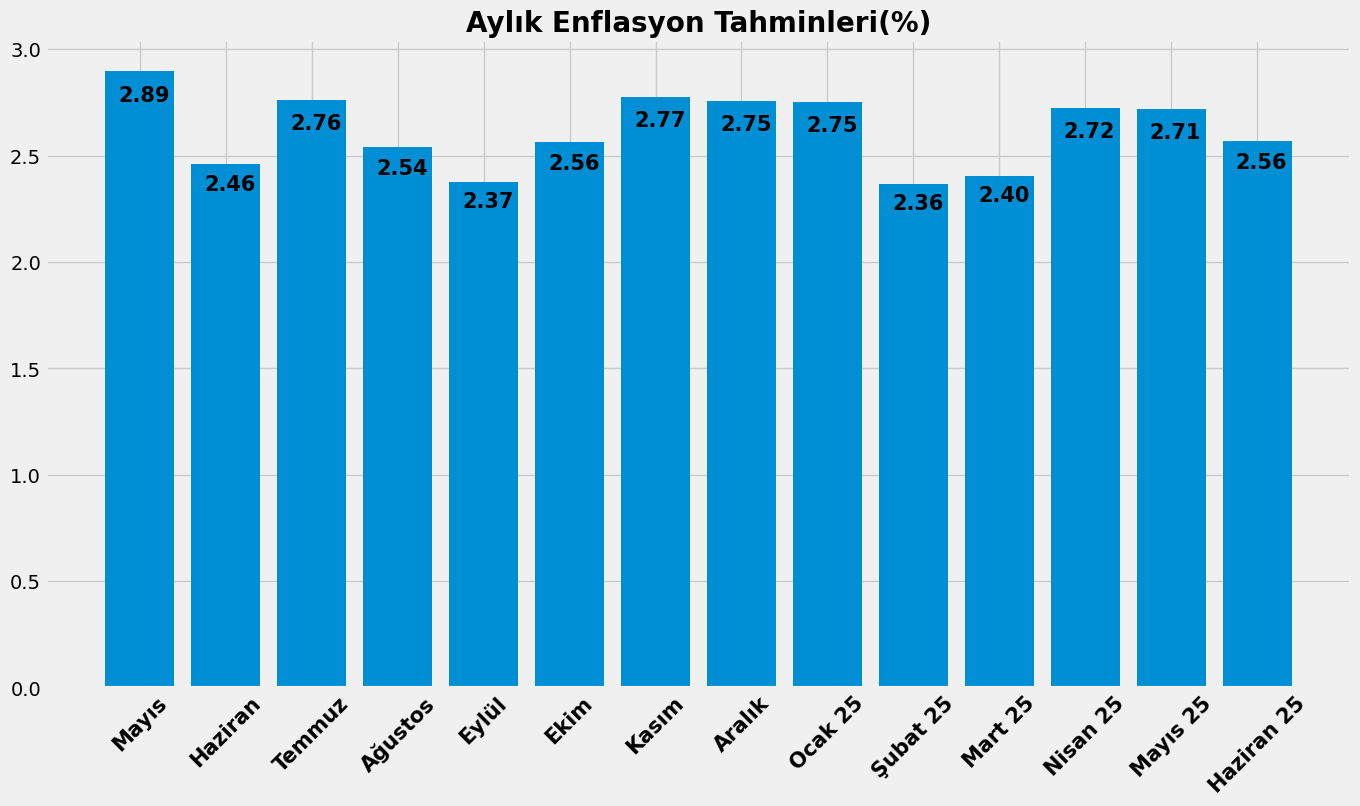

In [185]:
plt.figure(figsize=(15,8))
plt.bar(x=["Mayıs","Haziran","Temmuz","Ağustos","Eylül","Ekim","Kasım","Aralık","Ocak 25","Şubat 25","Mart 25","Nisan 25","Mayıs 25","Haziran 25"],height=aylıktahmin.iloc[:,-1])
plt.xticks(rotation=45,fontweight="bold",color="black",fontsize=15)
plt.title("Aylık Enflasyon Tahminleri(%)",fontweight="bold",fontsize=20)
plt.annotate(str(aylıktahmin.iloc[0,-1])[:4],xy=(-0.25,aylıktahmin.iloc[0,-1]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[1,-1])[:4],xy=(0.75,aylıktahmin.iloc[1,-1]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[2,-1])[:4],xy=(1.75,aylıktahmin.iloc[2,-1]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[3,-1])[:4],xy=(2.75,aylıktahmin.iloc[3,-1]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[4,-1])[:4],xy=(3.75,aylıktahmin.iloc[4,-1]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[5,-1])[:4],xy=(4.75,aylıktahmin.iloc[5,-1]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[6,-1])[:4],xy=(5.75,aylıktahmin.iloc[6,-1]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[7,-1])[:4],xy=(6.75,aylıktahmin.iloc[7,-1]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[8,-1])[:4],xy=(7.75,aylıktahmin.iloc[8,-1]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[9,-1])[:4],xy=(8.75,aylıktahmin.iloc[9,-1]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[10,-1])[:4],xy=(9.75,aylıktahmin.iloc[10,-1]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[11,-1])[:4],xy=(10.75,aylıktahmin.iloc[11,-1]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[12,-1])[:4],xy=(11.75,aylıktahmin.iloc[12,-1]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[13,-1])[:4],xy=(12.75,aylıktahmin.iloc[13,-1]*0.95),fontweight="bold",fontsize=15)


